In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import re
from scipy.stats import pearsonr
import math
from statistics import median
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xbg
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.tree import DecisionTreeRegressor
from numpy import mean
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, StackingRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None

In [2]:
# STEP [1]================================== Look At The Big Picture ================================================

In [3]:
# STEP [2]================================== Get The Data ================================================
df = pd.read_csv('../datasets/films_revenue_dataset.csv')

In [4]:
# STEP [3]================================== Discover and Visualize The Data to Gain Insights ================================================
df.head(5)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0    2/20/2015    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1     8/6/2004   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2   10/10/2014   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3     3/9/2012   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4     2/5/2009   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
print(f"dataset data has {df.shape[0]} rows and {df.shape[1]} columns")

dataset data has 3000 rows and 23 columns


In [7]:
# Phân tích dữ liệu
train_features = []
log_features = []
drop_cols = []

In [8]:
# Phân tích cột Revenue - doanh thu
print(f"Missing values of revenue in train sets is {df['revenue'].isna().sum()}")

Missing values of revenue in train sets is 0


In [9]:
print(f"Mean of revenue in dataset set is {df['revenue'].mean()}")
print(f"Median of revenue in dataset set is {df['revenue'].median()}")

Mean of revenue in dataset set is 66725851.88866667
Median of revenue in dataset set is 16807068.0


c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


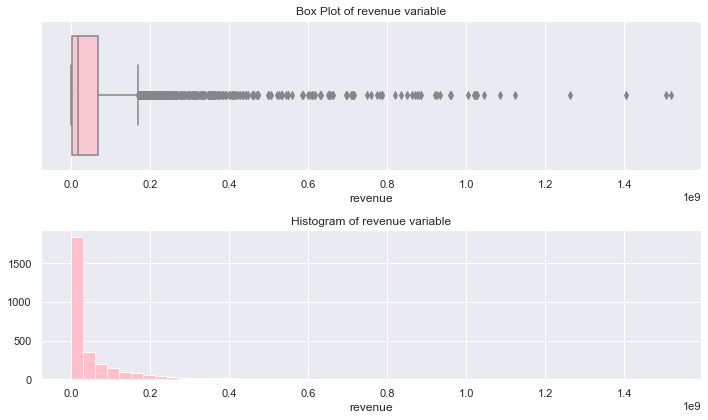

In [11]:
fig, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['revenue'], ax = ax[0], color='pink')
ax[0].set_title("Box Plot of revenue variable")
sns.distplot(a=df['revenue'], kde = False, ax = ax[1], color='pink', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of revenue variable")
fig.tight_layout()

In [12]:
df['revenue'].nsmallest(20)

347      1
1754     1
1874     1
1917     1
695      2
334      3
1541     3
2383     3
2117     4
1346     5
2490     6
1190     7
639      8
2251     8
2582     8
280     10
665     10
1141    11
312     12
450     12
Name: revenue, dtype: int64

In [13]:
df['revenue'].nlargest(10)

1126    1519557910
1761    1506249360
2770    1405403694
684     1262886337
2322    1123746996
906     1084939099
2135    1045713802
2562    1028570889
881     1025491110
734     1023784195
Name: revenue, dtype: int64

In [14]:
log_features.append('revenue')

In [15]:
# Phân tích cột Belong to collections
# Cột này biểu diễn xem một bộ phim có nằm trong tập hay không.
# Tạm thời thì những bộ phim nào có thuộc bộ sưu tập sẽ cho là 1 ngược lại là 0
df['belongs_to_collection'] = df['belongs_to_collection'].fillna('')
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 1 if len(x) != 0 else 0)

In [16]:
df['belongs_to_collection'].value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

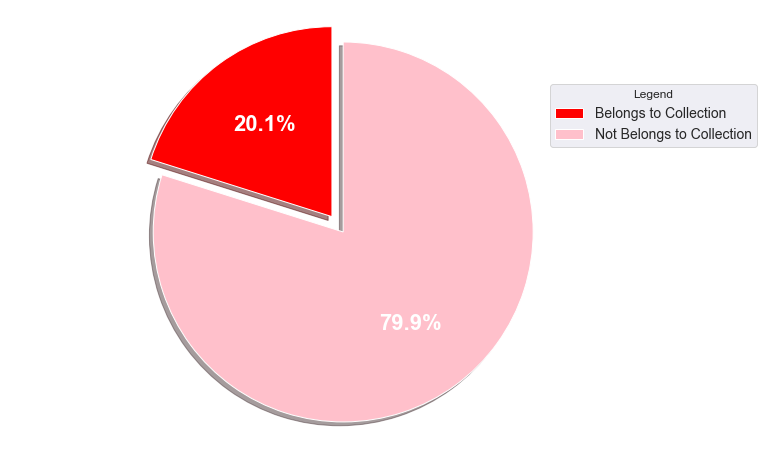

In [17]:
labels = "Belongs to Collection", "Not Belongs to Collection"
btc_1 = [df['belongs_to_collection'].value_counts()[1], df['belongs_to_collection'].value_counts()[0]]
explode = (0.1, 0)
colors = ['red', 'pink']
# plot
fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct="%1.1f%%", shadow=True, startangle=90, colors=colors, textprops={'color': 'w', 'fontsize': 22, 'weight': 'bold'})
ax.axis('equal')
ax.legend(labels, title='Legend', loc='center left', fontsize=14, bbox_to_anchor=(0.8, 0.25, 0.5, 1))

# Nhận xét: Có thể thuộc tính belongs_to_collection có thể ảnh hưởng đến doanh thu của bộ phim đó

0    2396
1     604
Name: belongs_to_collection, dtype: int64


[Text(0, 0, 'Belongs to Collection'), Text(1, 0, 'Not Belongs to Collection')]

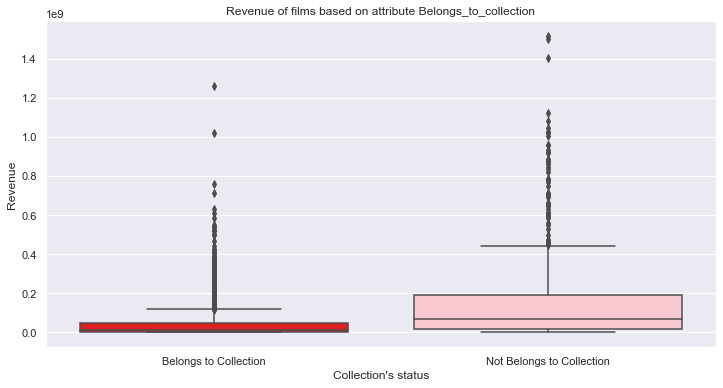

In [18]:
print(df['belongs_to_collection'].value_counts())
labels = "Belongs to Collection", "Not Belongs to Collection"
pal = ['red', 'pink']
#plot
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="belongs_to_collection", y = 'revenue', data=df, palette=pal)
plt.title("Revenue of films based on attribute Belongs_to_collection")
plt.xlabel("Collection's status")
plt.ylabel("Revenue")

ax.set_xticklabels(labels)

# Chắc chắn việc doanh thu của một bộ phim có phụ thuộc vào việc bộ phim đó có thuộc vào một bộ sưu tập hay không.

In [19]:
train_features.append("belongs_to_collection")

In [20]:
corr, _ = pearsonr(df['belongs_to_collection'], df['revenue'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.339


In [21]:
# Phân tích cột budget - kinh phí
print(f"Missing values of budget  is {df['budget'].isna().sum()}")

Missing values of budget  is 0


c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


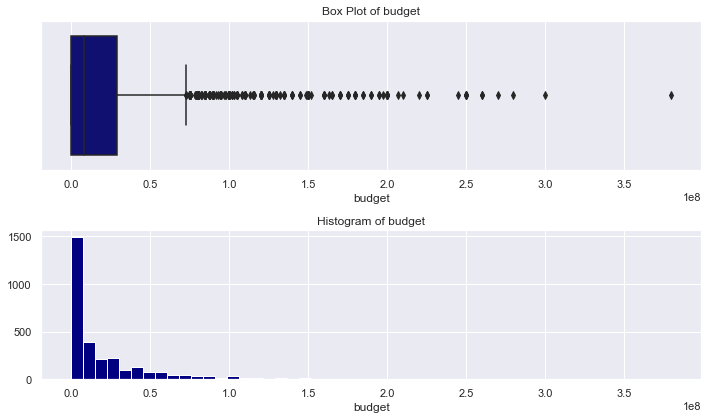

In [22]:
#plotting the data
fig, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['budget'], ax = ax[0], color='navy')
ax[0].set_title("Box Plot of budget")
sns.distplot(a=df['budget'], kde = False, ax = ax[1], color='navy', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of budget")
fig.tight_layout()

In [23]:
print(f"Number of films have budget is 0: {sum(df['budget'] == 0)}")

# ==> Có vấn đề khi kinh phí làm phim không thể nào bằng 0.

Number of films have budget is 0: 812


In [24]:
median_budget_higer_0 = df.loc[df['budget']> 0, 'budget'].median()
median_budget_higer_0

16000000.0

In [25]:
df['budget_processed'] = df['budget'].mask(df['budget'] == 0, median_budget_higer_0)

In [26]:
df['budget_processed'].nsmallest(10)

# Vẫn còn vấn đề khi kinh phí thấp nhất để hoàn thành một bộ phim là 7000 đô (theo google)

334     1.0
695     1.0
849     1.0
1346    1.0
2255    1.0
1754    2.0
2032    4.0
1198    5.0
1800    5.0
639     6.0
Name: budget_processed, dtype: float64

In [27]:
median_budget_higher_10000 = df.loc[df['budget']>= 10000, 'budget'].median()
df['budget_processed'] = df['budget'].mask(df['budget'] < 10000, median_budget_higher_10000)

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


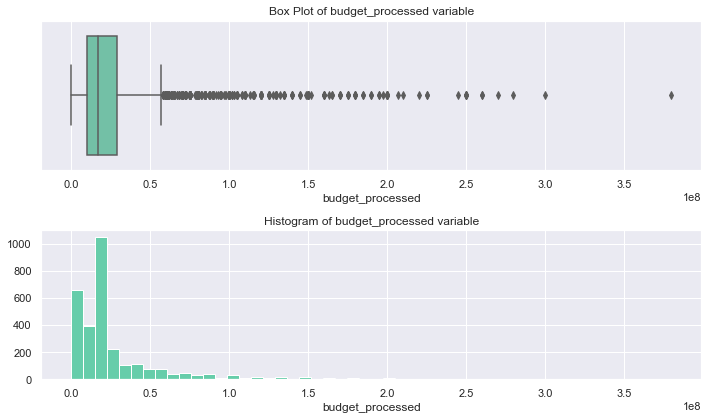

In [29]:
# Trực quan hóa
fig, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['budget_processed'], ax = ax[0], color='mediumaquamarine')
ax[0].set_title("Box Plot of budget_processed variable")
sns.distplot(a=df['budget_processed'], kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of budget_processed variable")
fig.tight_layout()

In [30]:
log_features.append('budget_processed')

In [31]:
corr, _ = pearsonr(df['budget_processed'], df['revenue'])
print('Pearsons correlation between budget_processed and revenue: %.3f' % corr)

Pearsons correlation between budget_processed and revenue: 0.746


In [32]:
# Phân tích cột genres
df['genres'].head(10)

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
5    [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
6    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
7                  [{'id': 99, 'name': 'Documentary'}]
8    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
9    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
Name: genres, dtype: object

In [33]:
print(f"Missing values of genres is {df['genres'].isna().sum()}")

Missing values of genres is 7


In [34]:
df['genres'] = df['genres'].fillna('')
df['genres_reform'] = df['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

In [35]:
df['genres_reform']

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres_reform, Length: 3000, dtype: object

In [36]:
# Giống One-Hot-Encoder
def get_genres(list, df):
    for i in range(len(df)):
        for name in list[i]:
            if name not in df.columns:
                df[name] = 0
            df[name][i] = 1
    return df

In [37]:
df = get_genres(df['genres_reform'], df)
print(df.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'budget_processed', 'genres_reform', 'Comedy', 'Drama', 'Family',
       'Romance', 'Thriller', 'Action', 'Animation', 'Adventure', 'Horror',
       'Documentary', 'Music', 'Crime', 'Science Fiction', 'Mystery',
       'Foreign', 'Fantasy', 'War', 'Western', 'History', 'TV Movie'],
      dtype='object')


In [38]:
df['num_genres'] = df['genres_reform'].apply(lambda x : len(x))

In [39]:
df['num_genres'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: num_genres, dtype: int64

In [40]:
# Lấy số lượng phim theo thể loại phim
genresDict = dict()

for genre in df["genres_reform"]:
    for elem in genre:
        if elem not in genresDict:
            genresDict[elem] = 1
        else:
            genresDict[elem] += 1

Text(0.5, 0, 'Genre')

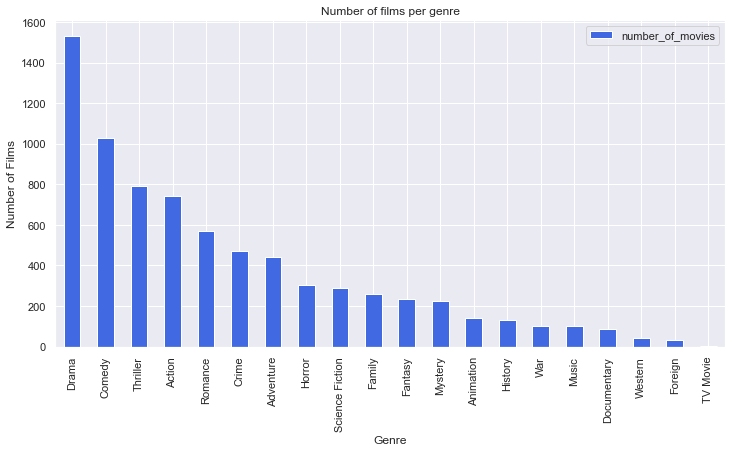

In [41]:
sns.set(rc={'figure.figsize':(12,6)})
genres_df = pd.DataFrame.from_dict(genresDict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Genre")

In [42]:
# median and mean revenue per genre type
for index, genre in enumerate(genres_df.index.values):
    genres_df.loc[genre, "median_rev"] = df[df[genre]==1].revenue.median()
    genres_df.loc[genre, "mean_rev"] = df[df[genre]==1].revenue.mean()

Text(0.5, 0, 'Genre')

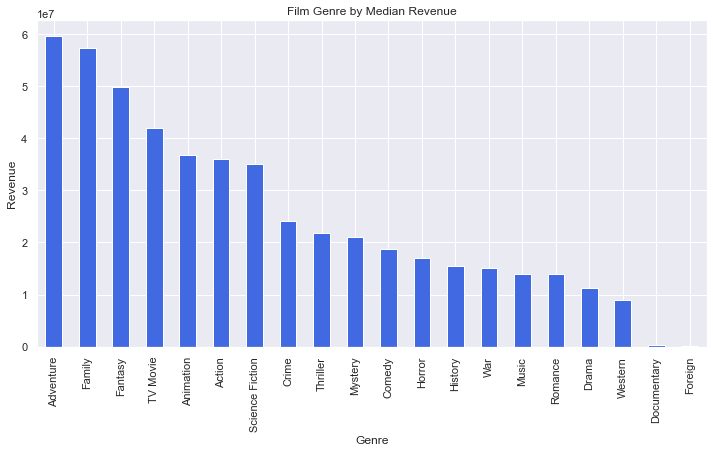

In [43]:
genres_df.sort_values(by=["median_rev"], ascending=False).median_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Median Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

Text(0.5, 0, 'Genre')

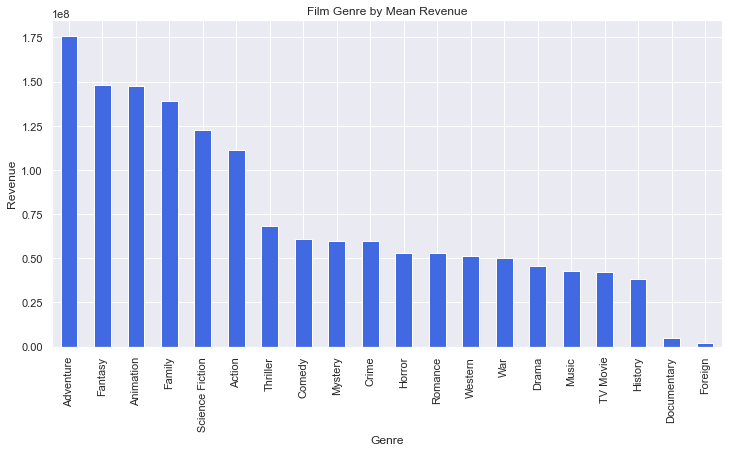

In [44]:
genres_df.sort_values(by=["mean_rev"], ascending=False).mean_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

In [52]:
topGenreDict = {}
for element in df[["revenue", "genres_reform"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in topGenreDict:
        topGenreDict[element[1][0]] = [element[0], 1]
    else:
        topGenreDict[element[1][0]][0] += element[0]
        topGenreDict[element[1][0]][1] += 1  
topGenreDict  

{'Comedy': [28843921162, 604],
 'Drama': [29279518839, 785],
 'Thriller': [6562633131, 116],
 'Action': [48670231899, 520],
 'Animation': [11254816053, 76],
 'Horror': [8429764946, 170],
 'Documentary': [251215748, 71],
 'Adventure': [35102805479, 187],
 'Crime': [6000547647, 147],
 'Mystery': [1573269684, 33],
 'Fantasy': [5599467168, 68],
 'War': [487770297, 20],
 'Science Fiction': [6717185856, 41],
 'Romance': [3460454044, 67],
 'Music': [677807691, 20],
 'Western': [843774276, 13],
 'Family': [5664509374, 36],
 'History': [707805166, 16],
 'Foreign': [281300, 2],
 'TV Movie': [42000000, 1]}

In [53]:
for genre in topGenreDict:
    topGenreDict[genre][0] = topGenreDict[genre][0]/topGenreDict[genre][1]
    topGenreDict[genre] = topGenreDict[genre][0]

In [54]:
topGenreDict   

{'Comedy': 47754836.36092715,
 'Drama': 37298750.1133758,
 'Thriller': 56574423.54310345,
 'Action': 93596599.80576923,
 'Animation': 148089684.90789473,
 'Horror': 49586852.62352941,
 'Documentary': 3538249.971830986,
 'Adventure': 187715537.32085562,
 'Crime': 40820052.02040816,
 'Mystery': 47674838.90909091,
 'Fantasy': 82345105.41176471,
 'War': 24388514.85,
 'Science Fiction': 163833801.36585367,
 'Romance': 51648567.82089552,
 'Music': 33890384.55,
 'Western': 64905713.538461536,
 'Family': 157347482.6111111,
 'History': 44237822.875,
 'Foreign': 140650.0,
 'TV Movie': 42000000.0}

<AxesSubplot:>

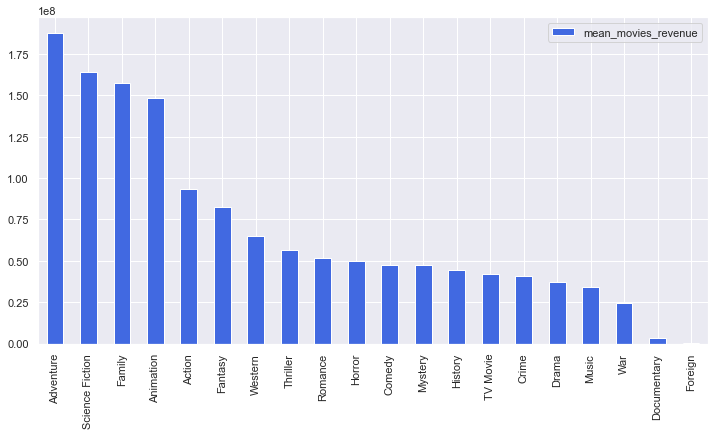

In [55]:
genres_df = pd.DataFrame.from_dict(topGenreDict, orient='index', columns=["mean_movies_revenue"])
genres_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='royalblue')

In [56]:
topGenreDict = {k: v for k, v in sorted(topGenreDict.items(), key=lambda item: item[1], reverse = False)}

In [57]:
topGenreDict

{'Foreign': 140650.0,
 'Documentary': 3538249.971830986,
 'War': 24388514.85,
 'Music': 33890384.55,
 'Drama': 37298750.1133758,
 'Crime': 40820052.02040816,
 'TV Movie': 42000000.0,
 'History': 44237822.875,
 'Mystery': 47674838.90909091,
 'Comedy': 47754836.36092715,
 'Horror': 49586852.62352941,
 'Romance': 51648567.82089552,
 'Thriller': 56574423.54310345,
 'Western': 64905713.538461536,
 'Fantasy': 82345105.41176471,
 'Action': 93596599.80576923,
 'Animation': 148089684.90789473,
 'Family': 157347482.6111111,
 'Science Fiction': 163833801.36585367,
 'Adventure': 187715537.32085562}

In [58]:
def getGenreRank(genres):
    sum = 0
    for g in genres:
        sum += list(topGenreDict.keys()).index(g)
    return (sum / len(genres))

In [59]:
df['genre_rank'] = df['genres_reform'].apply(lambda x: getGenreRank(x) if len(x) > 0 else 0)

df['genre_rank'].value_counts()

9.000000     273
4.000000     270
8.000000     229
10.000000    216
7.500000     132
            ... 
9.833333       1
7.600000       1
9.200000       1
16.600000      1
2.666667       1
Name: genre_rank, Length: 132, dtype: int64

In [60]:
df['genre_rank'].head(5)

0     9.00
1    10.25
2     4.00
3     8.00
4    13.50
Name: genre_rank, dtype: float64

In [61]:
log_features.append('genre_rank')
log_features.append('num_genres')

In [62]:
corr, _ = pearsonr(df['genre_rank'], df['revenue'])
print('Pearsons correlation between genre_rank and revenue: %.3f' % corr)
corr, _ = pearsonr(df['num_genres'], df['revenue'])
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)

Pearsons correlation between genre_rank and revenue: 0.324
Pearsons correlation between num_genres and revenue: 0.164


In [63]:
# Phân tích Homepage
print(f"Mising values of homepage is {df['homepage'].isna().sum()}")

Mising values of homepage is 2054


In [64]:
df['has_homepage'] = df['homepage'].astype('string')
df['has_homepage'] = df['homepage'].apply(lambda x: 1 if len(x) != 0 else 0)

In [65]:
df['has_homepage'].value_counts()

0    2054
1     946
Name: has_homepage, dtype: int64

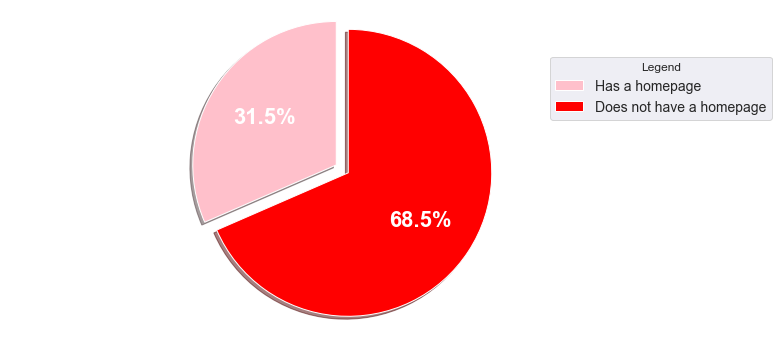

In [66]:
labels = 'Has a homepage', 'Does not have a homepage'
btc_1 = [df['has_homepage'].value_counts()[1], df['has_homepage'].value_counts()[0]]
explode = (0.1, 0)

colors = ['pink', 'red']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal')

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()

In [67]:
print("Mean revenue for movies with a homepage: %.2f" % df.loc[df['has_homepage'] == 1, "revenue"].mean())
print("Median revenue for movies with a homepage: %.2f" % df.loc[df['has_homepage'] == 1, "revenue"].median())
print("\n")
print("Mean revenue for movies without a homepage: %.2f" % df.loc[df['has_homepage'] == 0, "revenue"].mean())
print("Median revenue for movies without a homepage: %.2f" % df.loc[df['has_homepage'] == 0, "revenue"].median())

Mean revenue for movies with a homepage: 120051698.84
Median revenue for movies with a homepage: 35455217.00


Mean revenue for movies without a homepage: 42165846.43
Median revenue for movies without a homepage: 12328641.50


[Text(0, 0, 'Has a homepage'), Text(1, 0, 'Does not have a homepage')]

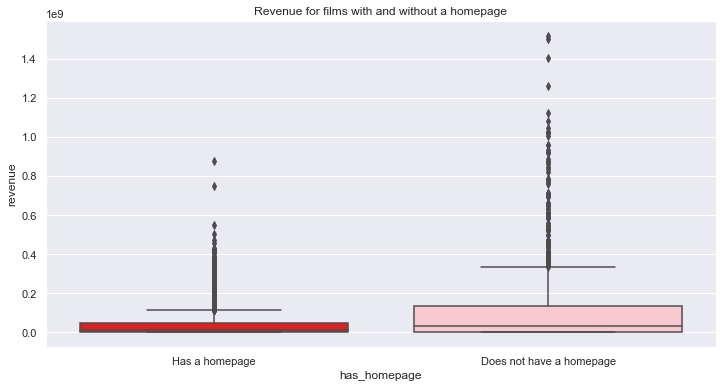

In [69]:
pal1 = ['red', 'pink']

ax = sns.boxplot(x='has_homepage', y='revenue', data=df, palette=pal1);
plt.title('Revenue for films with and without a homepage');

labels = 'Has a homepage', 'Does not have a homepage'
ax.set_xticklabels(labels)

In [70]:
train_features.append('has_homepage')

In [71]:
corr, _ = pearsonr(df['has_homepage'], df['revenue'])
print('Pearsons correlation between has_homepage and revenue: %.3f' % corr)

Pearsons correlation between has_homepage and revenue: 0.263


In [72]:
# Phân tích cột IMDB_id
drop_cols.append("imdb_id")

In [73]:
# Phân tích cột original_language
print("Counts of each original language:")
print(df['original_language'].value_counts()[0:5])

Counts of each original language:
en    2575
fr      78
ru      47
es      43
hi      42
Name: original_language, dtype: int64


Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

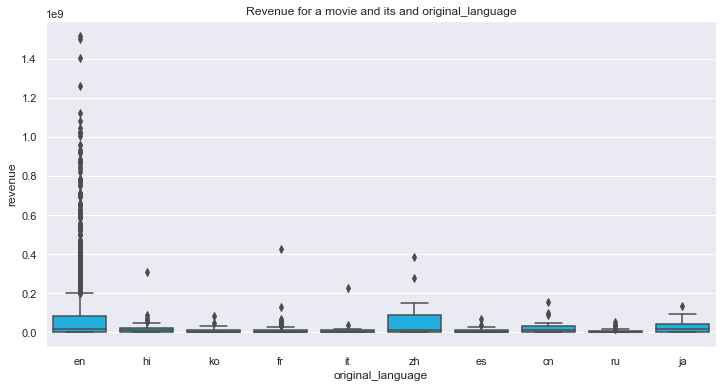

In [75]:
sns.boxplot(x='original_language', y='revenue', color='deepskyblue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

In [76]:
df['originally_english'] = df['original_language'].apply(lambda x: 1 if x == 'en' else 0)
df['originally_english'].value_counts()

1    2575
0     425
Name: originally_english, dtype: int64

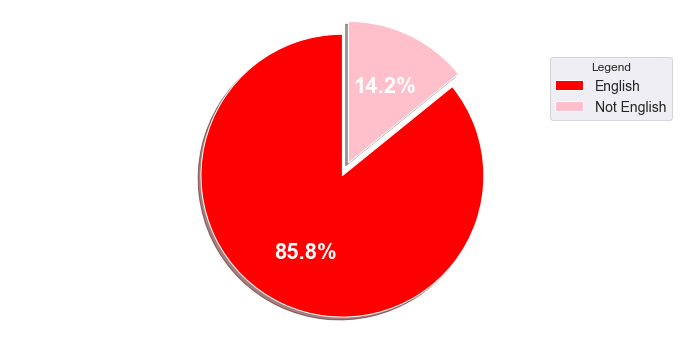

In [77]:
labels = 'English', 'Not English'
btc_1 = [(df.originally_english == 1).sum(axis=0), (df.originally_english == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['red', 'pink']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal')

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()

[Text(0, 0, 'Not in English'), Text(1, 0, 'In English')]

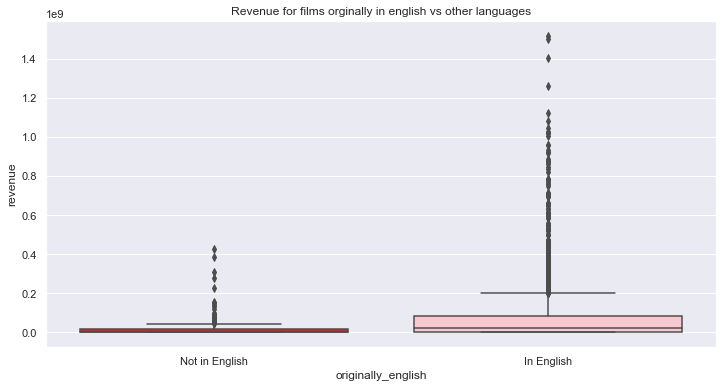

In [78]:
pal2 = ['red', 'pink']

ax = sns.boxplot(x='originally_english', y='revenue', data=df, palette=pal2);
plt.title('Revenue for films orginally in english vs other languages');

labels = 'Not in English', 'In English'
ax.set_xticklabels(labels)

In [79]:
train_features.append('originally_english')

In [80]:
corr, _ = pearsonr(df['originally_english'], df['revenue'])
print('Pearsons correlation between in_english and revenue: %.3f' % corr)

Pearsons correlation between in_english and revenue: 0.142


In [81]:
# Phân tích cột Orinal_title
drop_cols.append('original_title')

In [82]:
# Phân tích cột overview
print(f"Missing values of Overview: {df['overview'].isna().sum()}")

Missing values of Overview: 8


In [83]:
drop_cols.append('overview')

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


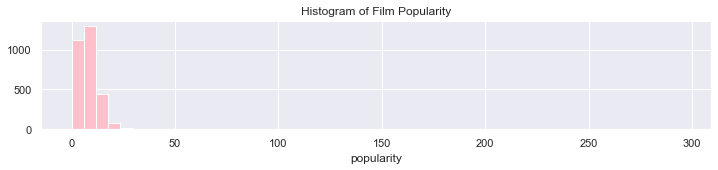

In [85]:
sns.distplot(df['popularity'], kde=False, color='pink', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12, 2)})
plt.title('Histogram of Film Popularity')
plt.show();

In [86]:
print(df['popularity'].describe())

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64


Text(0.5, 1.0, 'Popularity of Films by Revenue')

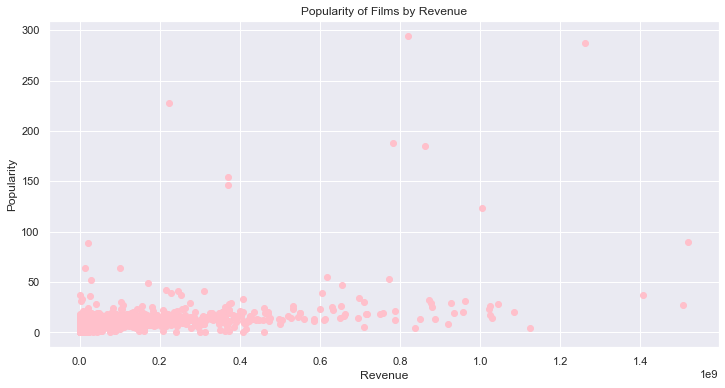

In [87]:
sns.set(rc={'figure.figsize':(12, 6)})
plt.plot(df['revenue'], df['popularity'], 'o', color='pink')
plt.ylabel("Popularity")
plt.xlabel("Revenue")
plt.title("Popularity of Films by Revenue")

In [88]:
drop_cols.append('popularity')

In [89]:
# Phân tích cột Poster path
drop_cols.append('poster_path')

In [90]:
# Phân tích cột production_companies
print(f"Missing values of production companies is {df['production_companies'].isna().sum()}")

Missing values of production companies is 156


In [91]:
df['production_companies'].head(5)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [92]:
df['production_companies'] = df['production_companies'].fillna('')
df['production_companies_reform'] = df['production_companies'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))


In [93]:
df['production_companies_reform']

0       [Paramount Pictures, United Artists, Metro-Gol...
1                                  [Walt Disney Pictures]
2       [Bold Films, Blumhouse Productions, Right of W...
3                                                      []
4                                                      []
                              ...                        
2995             [Warner Bros., Morgan Creek Productions]
2996                           [Memfis Film, Film i Väst]
2997    [New Line Cinema, Forge, The Steve Tisch Company]
2998                   [Jersey Films, Loofah Productions]
2999    [Lions Gate Films, Vertigo Entertainment, Goth...
Name: production_companies_reform, Length: 3000, dtype: object

In [94]:
df['num_studios'] = df['production_companies_reform'].apply(lambda x: len(x))
df['num_studios'] = df['production_companies_reform'].apply(lambda x: len(x))

df['num_studios'].value_counts()

1     781
2     734
3     582
4     308
5     166
0     157
6     116
7      69
8      36
9      27
10      8
11      6
15      3
12      3
14      2
13      1
16      1
Name: num_studios, dtype: int64

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


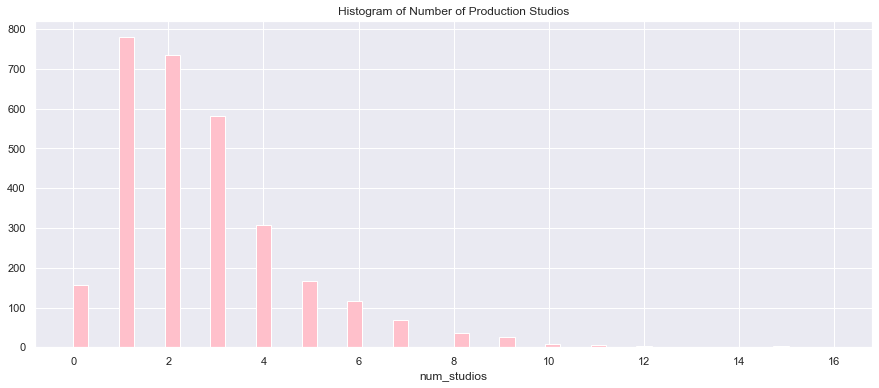

In [96]:
sns.distplot(df['num_studios'], kde=False, color='pink', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})
plt.title('Histogram of Number of Production Studios')
plt.show();

In [100]:
companiesDict = {}
for element in df["production_companies_reform"].values:
    for company in element:
        if company not in companiesDict:
            companiesDict[company] = 1
        else:
            companiesDict[company] += 1

In [101]:
companies_df = pd.DataFrame.from_dict(companiesDict, orient='index', columns=["number_of_studios"])

In [103]:
companies_df.index.values
for company in companies_df.index.values:
    df[company] = df['production_companies_reform'].apply(lambda x: 1 if company in x else 0)

<ipython-input-103-463ae6a365fd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[company] = df['production_companies_reform'].apply(lambda x: 1 if company in x else 0)
<ipython-input-103-463ae6a365fd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[company] = df['production_companies_reform'].apply(lambda x: 1 if company in x else 0)
<ipython-input-103-463ae6a365fd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

In [104]:
# median revenue per production studio
for index, company in enumerate(companies_df.index.values):
    companies_df.loc[company, "median_rev"] = df[df[company]==1].revenue.median()
    companies_df.loc[company, "mean_rev"] = df[df[company]==1].revenue.mean()
    companies_df.loc[company, "sum_rev"] = df[df[company]==1].revenue.sum()

In [105]:
companies_df.head(10)

number_of_studios   median_rev      mean_rev  \
Paramount Pictures                       161   52034889.0  1.247831e+08   
United Artists                            44   33307710.0  6.273135e+07   
Metro-Goldwyn-Mayer (MGM)                 84   13220811.0  6.872146e+07   
Walt Disney Pictures                      62  160440216.0  3.037771e+08   
Bold Films                                 4   40505329.0  3.977773e+07   
Blumhouse Productions                     18   72908237.0  1.013325e+08   
Right of Way Films                         4   16683906.0  4.937474e+07   
Ghost House Pictures                       5   85446075.0  8.917855e+07   
North Box Productions                      1   85446075.0  8.544608e+07   
Jim Henson Productions                     1   34327391.0  3.432739e+07   

                                sum_rev  
Paramount Pictures         2.009007e+10  
United Artists             2.760179e+09  
Metro-Goldwyn-Mayer (MGM)  5.772602e+09  
Walt Disney Pictures       1.883418e+10  
Bold Films                 1.591109e+08  
Blumhouse Productions      1.823985e+09  
Right of Way Films         1.974990e+08  
Ghost House Pictures       4.458927e+08  
North Box Productions      8.544608e+07  
Jim Henson Productions     3.432739e+07

Text(0.5, 0, 'Production Studio')

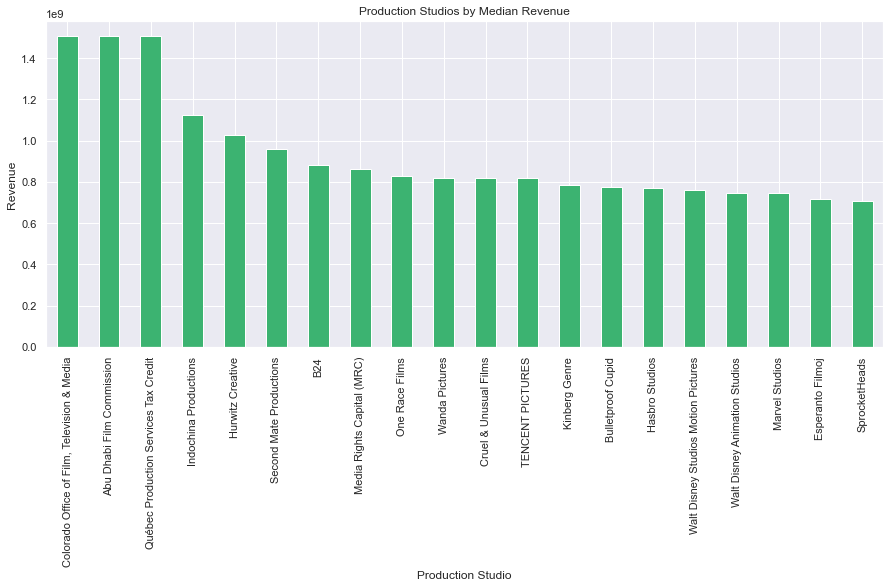

In [106]:
companies_df.sort_values(by=["median_rev"], ascending=False).median_rev.head(20).plot.bar(color='mediumseagreen')
plt.title("Production Studios by Median Revenue")
plt.ylabel("Revenue")
plt.xlabel("Production Studio")

Text(0.5, 0, 'Production Studio')

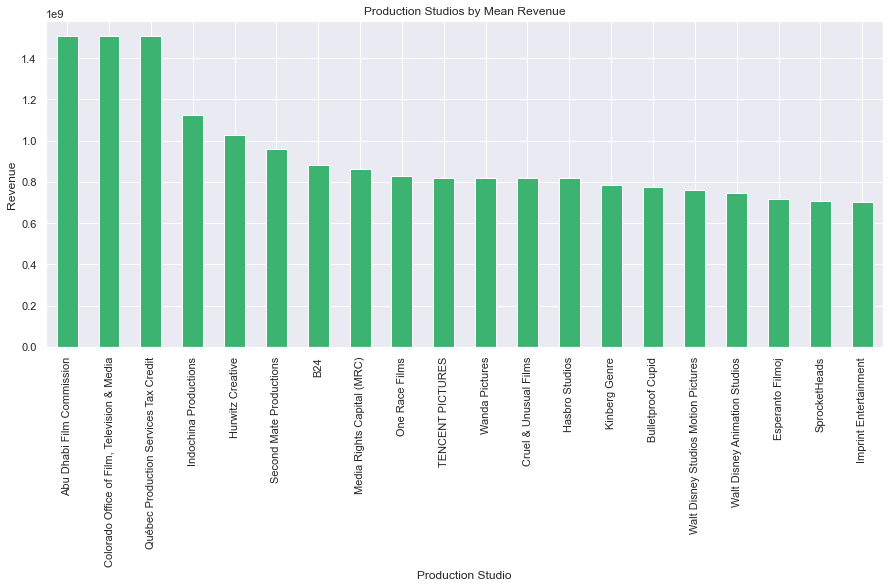

In [107]:
companies_df.sort_values(by=["mean_rev"], ascending=False).mean_rev.head(20).plot.bar(color='mediumseagreen')
plt.title("Production Studios by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Production Studio")

Text(0.5, 0, 'Production Studio')

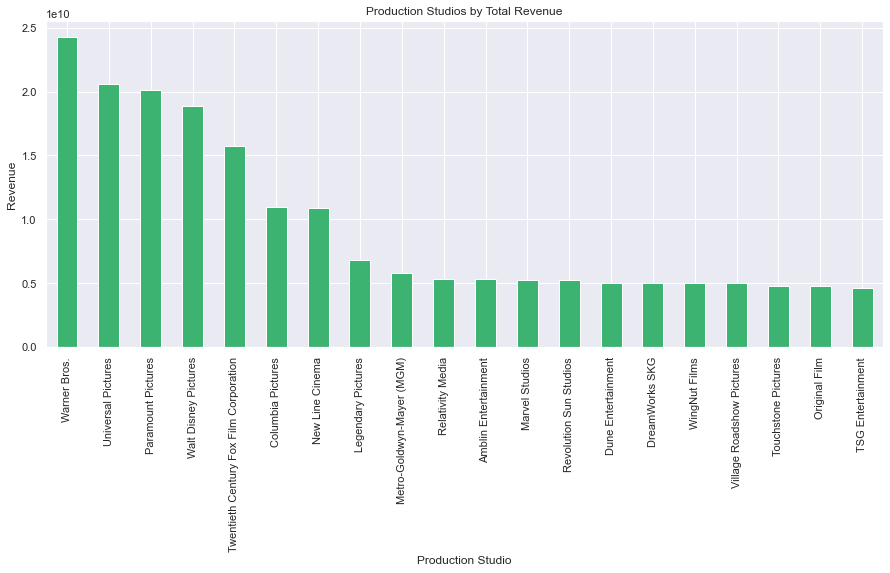

In [108]:
companies_df.sort_values(by=["sum_rev"], ascending=False).sum_rev.head(20).plot.bar(color='mediumseagreen')
plt.title("Production Studios by Total Revenue")
plt.ylabel("Revenue")
plt.xlabel("Production Studio")

In [109]:
studiosDict = {}
for element in df[["revenue", "production_companies_reform"]].values:
    temp = 3
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in studiosDict:
            studiosDict[element[1][i]] = [element[0], 1]
        else:
            studiosDict[element[1][i]][0] += element[0]
            studiosDict[element[1][i]][1] += 1    

studiosDict = {k: v for k, v in studiosDict.items() if v[1] >= 3}

In [110]:
studiosDict

{'Paramount Pictures': [20090073288, 161],
 'United Artists': [2760179230, 44],
 'Metro-Goldwyn-Mayer (MGM)': [2794133253, 73],
 'Walt Disney Pictures': [18834179118, 62],
 'Bold Films': [159110914, 4],
 'Blumhouse Productions': [1633496801, 16],
 'Right of Way Films': [33828974, 3],
 'Ghost House Pictures': [445892740, 5],
 'Castle Rock Entertainment': [1296139426, 21],
 'Twentieth Century Fox Film Corporation': [15348029275, 136],
 'DreamWorks SKG': [5051971983, 27],
 'Double Feature Films': [421100882, 8],
 'Jersey Films': [398259871, 6],
 'Cruise/Wagner Productions': [548163626, 5],
 'Amblin Entertainment': [4936000165, 22],
 'Craven-Maddalena Films': [234585473, 3],
 'BenderSpink': [280099115, 4],
 'BBC Films': [603202096, 30],
 'UK Film Council': [256292868, 6],
 'Prescience': [2887447, 3],
 'Current Entertainment': [193534418, 3],
 'TF1 Films Production': [761191638, 9],
 'New Line Cinema': [10886938228, 75],
 'Universal Pictures': [20618115682, 188],
 'Dark Horse Entertainment'

Text(0.5, 0, 'Production Studio')

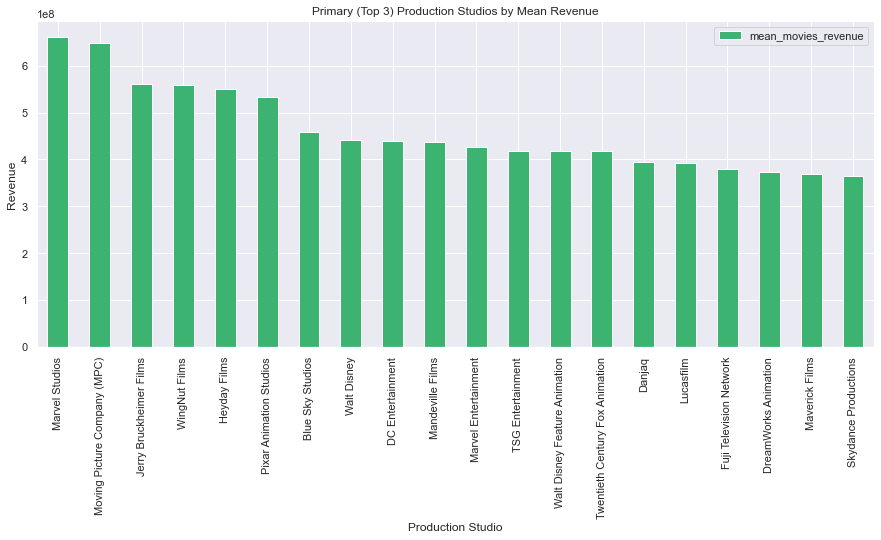

In [111]:
for company in studiosDict:
    studiosDict[company][0] = studiosDict[company][0]/studiosDict[company][1]
    studiosDict[company] = studiosDict[company][0]


    
    
studios_df = pd.DataFrame.from_dict(studiosDict, orient='index', columns=["mean_movies_revenue"])
studios_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar(color='mediumseagreen')
plt.title("Primary (Top 3) Production Studios by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Production Studio")

In [112]:
topStudiosDict = {}
for element in df[["revenue", "production_companies_reform"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in topStudiosDict:
        topStudiosDict[element[1][0]] = [element[0], 1]
    else:
        topStudiosDict[element[1][0]][0] += element[0]
        topStudiosDict[element[1][0]][1] += 1      

In [113]:
topStudiosDict

{'Paramount Pictures': [18496265449, 158],
 'Walt Disney Pictures': [18834179118, 62],
 'Bold Films': [159110914, 4],
 'Ghost House Pictures': [348349788, 4],
 'Castle Rock Entertainment': [523173714, 10],
 'United Artists': [2610513917, 41],
 'Twentieth Century Fox Film Corporation': [12100576796, 122],
 'DreamWorks SKG': [2411568341, 18],
 'Double Feature Films': [308783903, 6],
 'Hypnopolis': [198, 1],
 'BBC Films': [484060090, 27],
 'UK Film Council': [116706156, 2],
 'New Line Cinema': [7046373560, 69],
 'The Collective': [122178, 2],
 '\\xa0Braeburn Entertainment': [17011, 1],
 'New Zealand Film Commission': [6347717, 2],
 'Universal Pictures': [17846888025, 167],
 'Jean Doumanian Productions': [13835130, 1],
 'Fastnet Films': [7847000, 1],
 'De Laurentiis Entertainment Group (DEG)': [25975409, 3],
 'Gaumont': [507275869, 9],
 'Les Films du Losange': [36000000, 1],
 'Summit Entertainment': [2550286658, 21],
 'Magnet Releasing': [7171, 1],
 'Lawrence Bender Productions': [62512688

In [114]:
topStudiosDict = {k: v for k, v in topStudiosDict.items() if v[1] >= 5}

<AxesSubplot:>

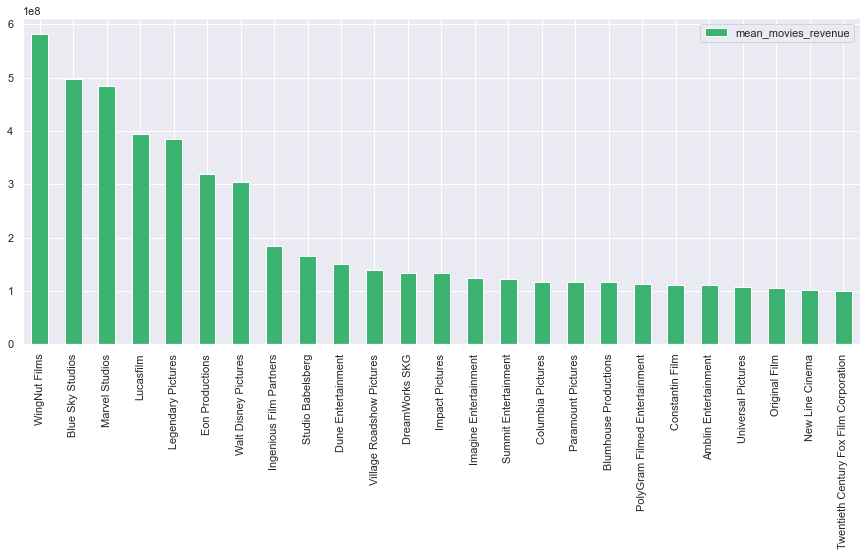

In [115]:
for company in topStudiosDict:
    topStudiosDict[company][0] = topStudiosDict[company][0]/topStudiosDict[company][1]
    topStudiosDict[company] = topStudiosDict[company][0]


    
    
studios_df = pd.DataFrame.from_dict(topStudiosDict, orient='index', columns=["mean_movies_revenue"])
studios_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='mediumseagreen')

In [116]:
topStudiosDict = {k: v for k, v in sorted(topStudiosDict.items(), key=lambda item: item[1], reverse = True)}
studiosDict = {k: v for k, v in sorted(studiosDict.items(), key=lambda item: item[1], reverse = True)}

In [117]:
def checkTopStudios(studio):
    if len(studio) < 1 or studio[0] not in list(topStudiosDict)[:50]:
        return 0
    else:
        return 1

In [118]:
def checkStudios(studio):
    if len(studio) < 1:
        return 0
    count = 0
    for company in studio[:10]:
        if company in list(studiosDict)[:100]:
            count += 1
    return count

In [119]:
def getStudioRanks(studios):
    if len(studios) < 1:
        return 400
    rank = 0
    for s in studios[:5]:
        if s in list(studiosDict):
            rank += list(studiosDict.keys()).index(s)
    if rank == 0:
        rank = 400
    return rank / len(studios)

In [120]:
df['topStudio'] = df['production_companies_reform'].apply(lambda x: checkTopStudios(x))
df['numTopStudios'] = df['production_companies_reform'].apply(lambda x: checkStudios(x))

In [121]:
df['studioRank'] = df['production_companies_reform'].apply(lambda x: getStudioRanks(x))

In [122]:
print(df['topStudio'].value_counts())
print()
print(df['numTopStudios'].value_counts())
print()
print(df['studioRank'].value_counts())

0    1682
1    1318
Name: topStudio, dtype: int64

0    2187
1     597
2     158
3      52
4       4
5       2
Name: numTopStudios, dtype: int64

400.000000    470
200.000000    154
133.333333    104
91.000000      52
109.000000     40
             ... 
166.500000      1
33.333333       1
256.000000      1
211.250000      1
67.666667       1
Name: studioRank, Length: 986, dtype: int64


In [123]:
corr, _ = pearsonr(df['topStudio'], df['revenue'])
print('Pearsons correlation between topStudio and revenue: %.3f' % corr)

corr, _ = pearsonr(df['numTopStudios'], df['revenue'])
print('Pearsons correlation between numTopStudios and revenue: %.3f' % corr)

corr, _ = pearsonr(df['studioRank'], df['revenue'])
print('Pearsons correlation between studioRank and revenue: %.3f' % corr)

corr, _ = pearsonr(df['num_studios'], df['revenue'])
print('Pearsons correlation between num_studios and revenue: %.3f' % corr)

Pearsons correlation between topStudio and revenue: 0.320
Pearsons correlation between numTopStudios and revenue: 0.558
Pearsons correlation between studioRank and revenue: -0.309
Pearsons correlation between num_studios and revenue: 0.154


In [124]:
train_features.append('topStudio')
log_features.append('numTopStudios')
log_features.append('num_studios')
log_features.append('studioRank')

In [125]:
# Phân tích cột Production Countries
print(f"Missing values of production_countries is {df['production_countries'].isna().sum()}")

Missing values of production_countries is 55


In [126]:
df['production_countries'].head(10)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
5                                                  NaN
6    [{'iso_3166_1': 'US', 'name': 'United States o...
7                                                  NaN
8    [{'iso_3166_1': 'US', 'name': 'United States o...
9    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [130]:
df['production_countries'] = df['production_countries'].fillna("")
df['production_countries_processed'] = df['production_countries'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
df['num_production_countries'] = df['production_countries_processed'].apply(lambda x: len(x))

<AxesSubplot:xlabel='num_production_countries', ylabel='count'>

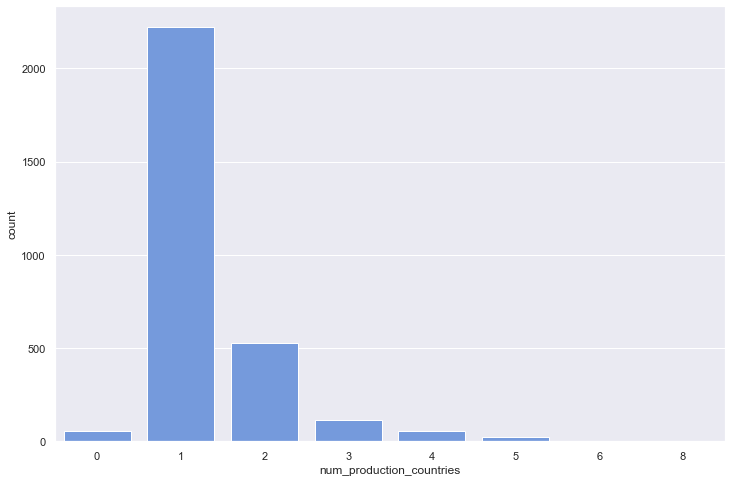

In [131]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=df['num_production_countries'], color='cornflowerblue')

<AxesSubplot:>

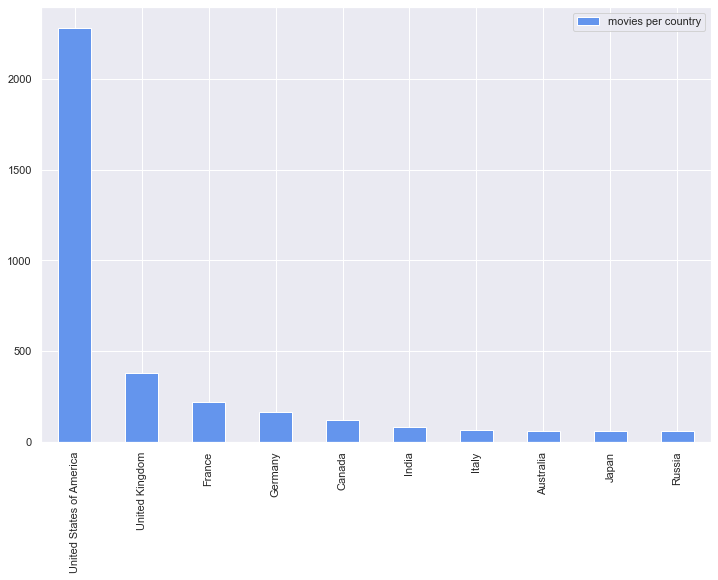

In [132]:
countriesDict = {}
for element in df["production_countries_processed"].values:
    for country in element:
        if country not in countriesDict:
            countriesDict[country] = 1
        else:
            countriesDict[country] += 1

countries_df = pd.DataFrame.from_dict(countriesDict, orient='index', columns=["movies per country"])
countries_df.sort_values(by="movies per country", ascending=False).head(10).plot.bar(color='cornflowerblue')

In [133]:
df['usa_produced'] = df['production_countries_processed'].apply(lambda x: 1 if 'United States of America' in x else 0)
df['usa_produced'].value_counts()

1    2282
0     718
Name: usa_produced, dtype: int64

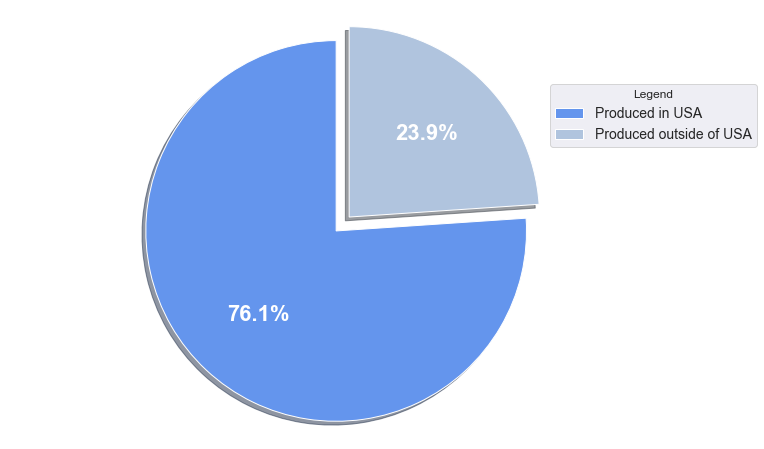

In [134]:
labels = 'Produced in USA', 'Produced outside of USA'
btc = [df['usa_produced'].value_counts()[1], df['usa_produced'].value_counts()[0]]
explode = (0.1, 0)

colors = ['cornflowerblue', 'lightsteelblue']

fig, ax = plt.subplots()
ax.pie(btc, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show() 

Text(0.5, 1.0, 'Revenue based on number of production countries')

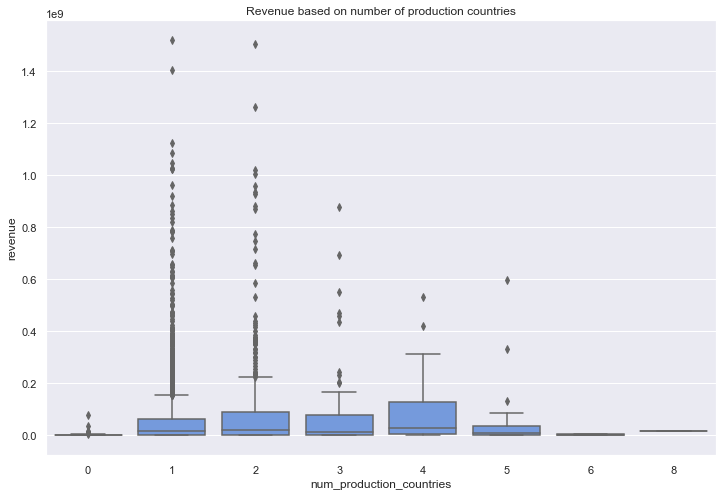

In [135]:
sns.boxplot(x='num_production_countries', y='revenue', data=df, color='cornflowerblue')
plt.title('Revenue based on number of production countries')

In [136]:
corr, _ = pearsonr(df['num_production_countries'], df['revenue'])
print('Pearsons correlation between num_production_countries and revenue: %.3f' % corr)

Pearsons correlation between num_production_countries and revenue: 0.053


[Text(0, 0, 'Produced outside of USA'), Text(1, 0, 'Produced in USA')]

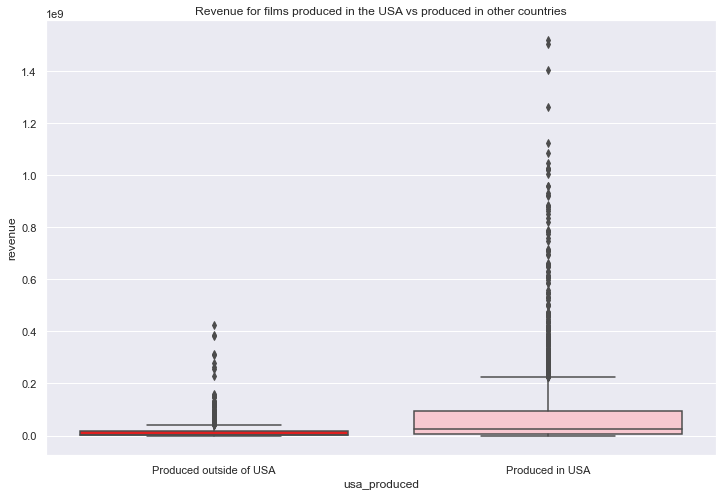

In [138]:
pal = ['red', 'pink']

ax = sns.boxplot(x='usa_produced', y='revenue', data=df, palette=pal);
plt.title('Revenue for films produced in the USA vs produced in other countries');

labels = 'Produced outside of USA', 'Produced in USA'
ax.set_xticklabels(labels)

In [139]:
corr, _ = pearsonr(df['usa_produced'], df['revenue'])
print('Pearsons correlation between usa_produced and revenue: %.3f' % corr)

Pearsons correlation between usa_produced and revenue: 0.198


In [140]:
log_features.append('num_production_countries')
train_features.append('usa_produced')

In [141]:
# Phân tích cột release_date
df['release_date'].head(10)

0     2/20/2015
1      8/6/2004
2    10/10/2014
3      3/9/2012
4      2/5/2009
5      8/6/1987
6     8/30/2012
7     1/15/2004
8     2/16/1996
9     4/16/2003
Name: release_date, dtype: object

In [142]:
df_date = df['release_date']

# converting to datetime format, with .dt used for accessing quantities
df_date = pd.to_datetime(df_date)
df_date.dt
print(df_date)

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
2995   1994-04-22
2996   2013-03-28
2997   1996-10-11
2998   2004-01-16
2999   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]


c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Year of Release Date by Number of Films')

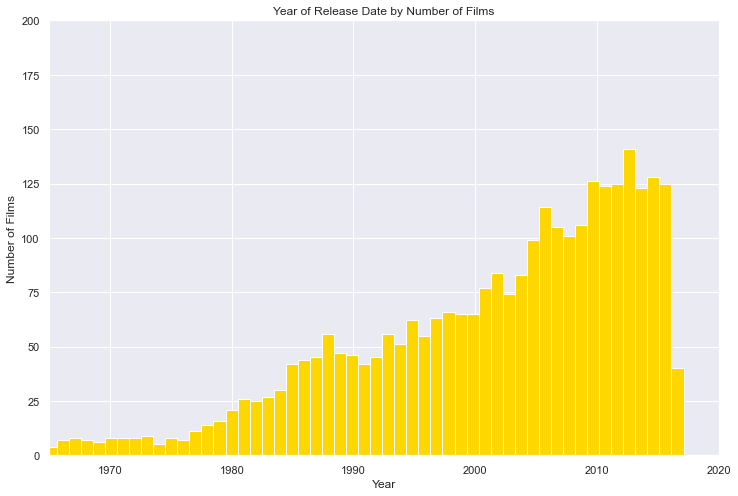

In [144]:
fig, dx = plt.subplots()
sns.distplot(df_date.dt.year, bins=99, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12, 6)})

dx.set(xlim=(1965, 2020),ylim=(0,200))
dx.set_xlabel("Year")
dx.set_ylabel("Number of Films")
dx.set_title("Year of Release Date by Number of Films")

<ipython-input-145-55c4a6201a9f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ex.set_xticklabels(labels)


[Text(-1.0, 0, ''),
 Text(0.0, 0, 'Monday'),
 Text(1.0, 0, 'Tuesday'),
 Text(2.0, 0, 'Wednesday'),
 Text(3.0, 0, 'Thursday'),
 Text(4.0, 0, 'Friday'),
 Text(5.0, 0, 'Saturday'),
 Text(6.0, 0, 'Sunday'),
 Text(7.0, 0, '')]

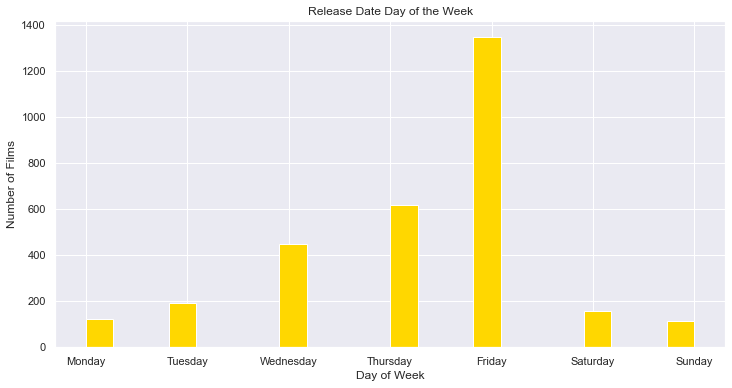

In [145]:
fig, ex = plt.subplots()
sns.distplot(df_date.dt.dayofweek, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})

ex.set_xlabel("Day of Week")
ex.set_ylabel("Number of Films")
ex.set_title("Release Date Day of the Week")

labels = [item.get_text() for item in ex.get_xticklabels()]
labels[1] = 'Monday'
labels[2] = 'Tuesday'
labels[3] = 'Wednesday'
labels[4] = 'Thursday'
labels[5] = 'Friday'
labels[6] = 'Saturday'
labels[7] = 'Sunday'

ex.set_xticklabels(labels)

Text(0.5, 1.0, 'Release Date Day of the Year')

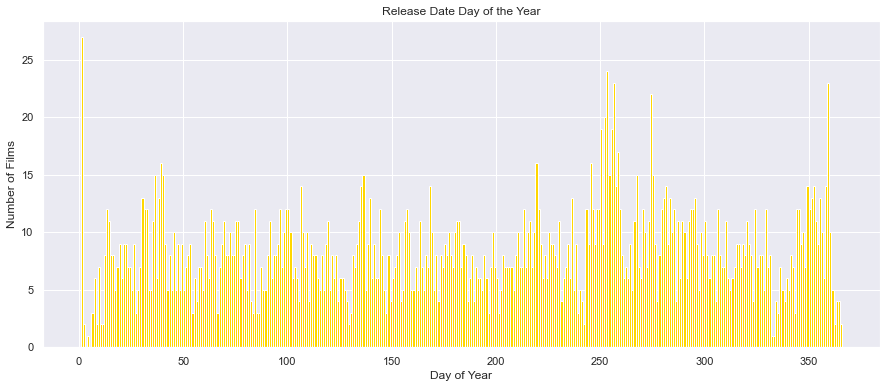

In [146]:
fig, fx = plt.subplots()
sns.distplot(df_date.dt.dayofyear, bins=365, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})

fx.set_xlabel("Day of Year")
fx.set_ylabel("Number of Films")
fx.set_title("Release Date Day of the Year")

<ipython-input-147-003abe420878>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.distplot(df_date.dt.weekofyear, bins=52, kde=False, color='gold', hist_kws=dict(alpha=1))
c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Release Date Month of the Year')

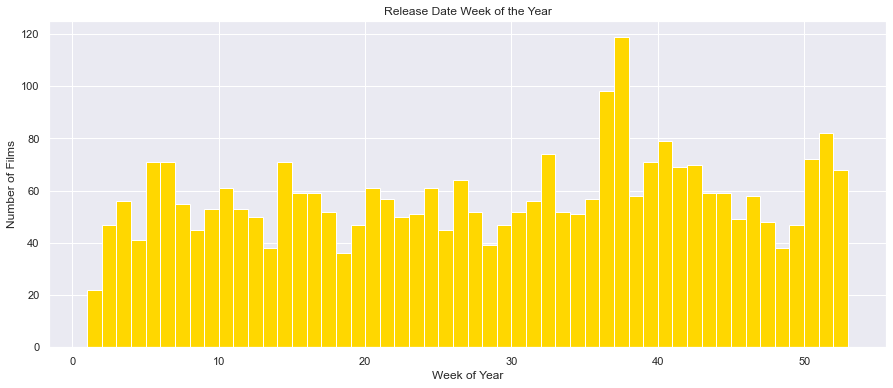

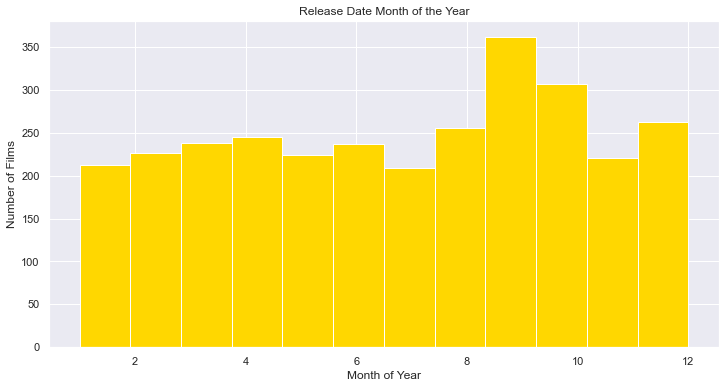

In [147]:
fig, gx = plt.subplots()
sns.distplot(df_date.dt.weekofyear, bins=52, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12,6)})

gx.set_xlabel("Week of Year")
gx.set_ylabel("Number of Films")
gx.set_title("Release Date Week of the Year")

print()

# plotting the films release month of the year
fig, hx = plt.subplots()
sns.distplot(df_date.dt.month, bins=12, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12,6)})

hx.set_xlabel("Month of Year")
hx.set_ylabel("Number of Films")
hx.set_title("Release Date Month of the Year")

[Text(0, 0, '1930'),
 Text(1, 0, '1931'),
 Text(2, 0, '1932'),
 Text(3, 0, '1933'),
 Text(4, 0, '1935'),
 Text(5, 0, '1936'),
 Text(6, 0, '1938'),
 Text(7, 0, '1939'),
 Text(8, 0, '1940'),
 Text(9, 0, '1942'),
 Text(10, 0, '1943'),
 Text(11, 0, '1944'),
 Text(12, 0, '1945'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1950'),
 Text(17, 0, '1951'),
 Text(18, 0, '1952'),
 Text(19, 0, '1953'),
 Text(20, 0, '1954'),
 Text(21, 0, '1955'),
 Text(22, 0, '1956'),
 Text(23, 0, '1957'),
 Text(24, 0, '1958'),
 Text(25, 0, '1959'),
 Text(26, 0, '1960'),
 Text(27, 0, '1961'),
 Text(28, 0, '1962'),
 Text(29, 0, '1963'),
 Text(30, 0, '1964'),
 Text(31, 0, '1965'),
 Text(32, 0, '1966'),
 Text(33, 0, '1967'),
 Text(34, 0, '1968'),
 Text(35, 0, '1969'),
 Text(36, 0, '1970'),
 Text(37, 0, '1971'),
 Text(38, 0, '1972'),
 Text(39, 0, '1973'),
 Text(40, 0, '1974'),
 Text(41, 0, '1975'),
 Text(42, 0, '1976'),
 Text(43, 0, '1977'),
 Text(44, 0, '1978'),
 Text(45, 0, '1979')

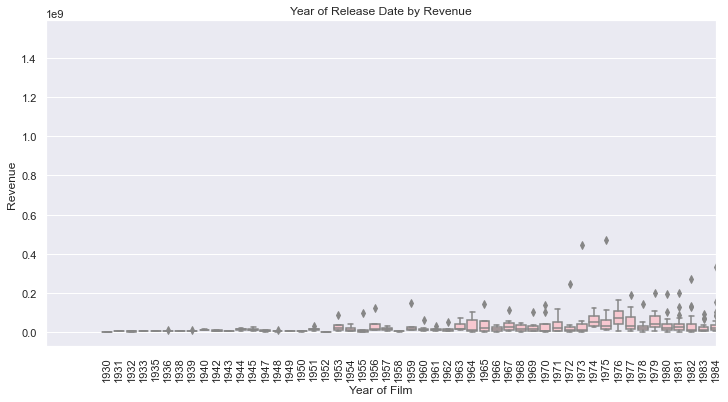

In [148]:
fig, dx = plt.subplots()
sns.boxplot(x=df_date.dt.year, y=df['revenue'], color='pink')
sns.set(rc={'figure.figsize':(12, 6)})

dx.set(xlim=(-5, 50))
dx.set_xlabel("Year of Film")
dx.set_ylabel("Revenue")
dx.set_title("Year of Release Date by Revenue")

dx.set_xticklabels(dx.get_xticklabels(), rotation=90)

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

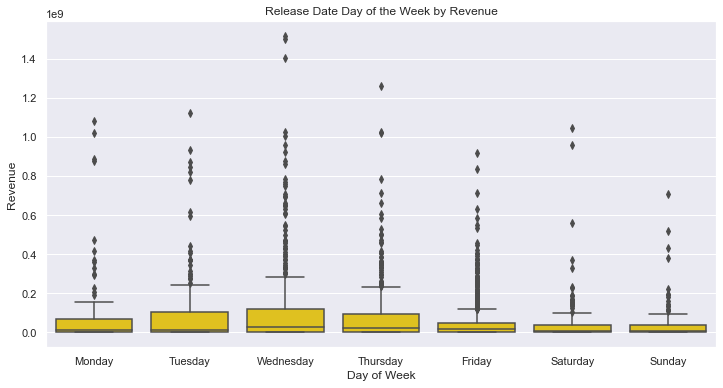

In [149]:
fig, ex = plt.subplots()
sns.boxplot(x=df_date.dt.dayofweek, y=df['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

ex.set_xlabel("Day of Week")
ex.set_ylabel("Revenue")
ex.set_title("Release Date Day of the Week by Revenue")

labels = [item.get_text() for item in ex.get_xticklabels()]
labels[0] = 'Monday'
labels[1] = 'Tuesday'
labels[2] = 'Wednesday'
labels[3] = 'Thursday'
labels[4] = 'Friday'
labels[5] = 'Saturday'
labels[6] = 'Sunday'

ex.set_xticklabels(labels)

Text(0.5, 1.0, 'Release Date Day of the Year by Revenue')

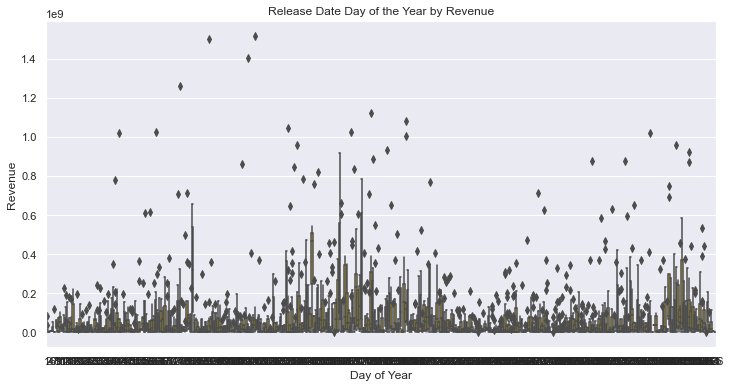

In [150]:
fig, fx = plt.subplots()
sns.boxplot(x=df_date.dt.dayofyear, y=df['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

fx.set_xlabel("Day of Year")
fx.set_ylabel("Revenue")
fx.set_title("Release Date Day of the Year by Revenue")

<ipython-input-151-85643657dabe>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.boxplot(x=df_date.dt.weekofyear, y=df['revenue'], color='gold')


Text(0.5, 1.0, 'Release Date Week of the Year by Revenue')

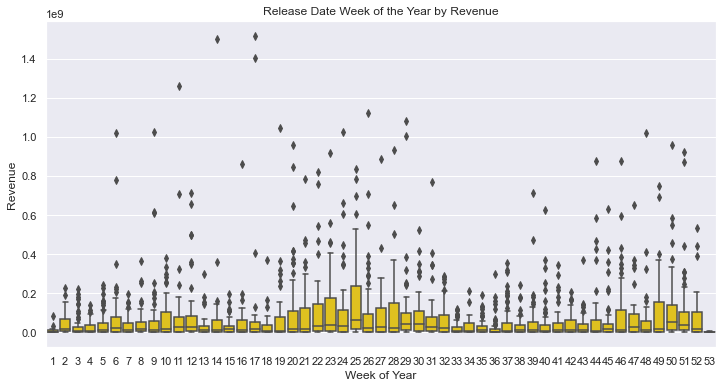

In [151]:
fig, gx = plt.subplots()
sns.boxplot(x=df_date.dt.weekofyear, y=df['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

gx.set_xlabel("Week of Year")
gx.set_ylabel("Revenue")
gx.set_title("Release Date Week of the Year by Revenue")

Text(0.5, 1.0, 'Release Date Month by Revenue')

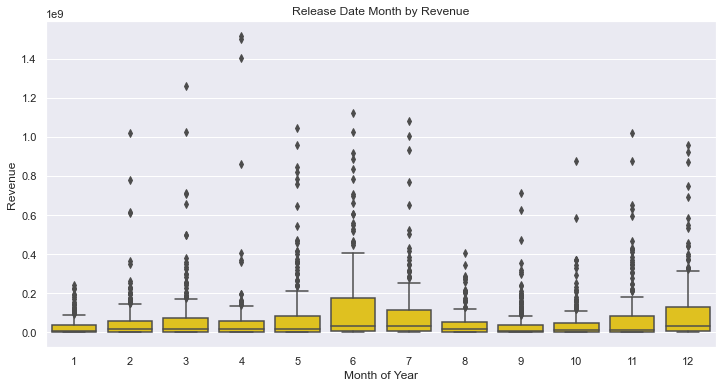

In [152]:
fig, hx = plt.subplots()
sns.boxplot(x=df_date.dt.month, y=df['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

hx.set_xlabel("Month of Year")
hx.set_ylabel("Revenue")
hx.set_title("Release Date Month by Revenue")

In [153]:
df["release_date"].mode()[0]

'9/10/2010'

In [155]:
df["release_date"] = df["release_date"].fillna(df["release_date"].mode()[0])
df['temp'] = pd.to_datetime(df['release_date'])

df["month"] = df["temp"].apply(lambda x: x.month)
df["year"] = df["temp"].apply(lambda x: x.year)

df["day_of_week"] = df["temp"].apply(lambda x: x.weekday()+1)

df["week_of_year"] = df["temp"].apply(lambda x: x.isocalendar()[1])

df = df.drop(['temp'], axis=1)


df["day_of_week"] = df["day_of_week"].fillna(df["day_of_week"].mode()[0])

df["year"] = df["year"].fillna(df["year"].mode()[0])

df["month"] = df["month"].fillna(df["month"].mode()[0])

df["week_of_year"] = df["week_of_year"].fillna(df["week_of_year"].mode()[0])


df[["release_date", "month", "year", "day_of_week", "week_of_year"]].head()

release_date  month  year  day_of_week  week_of_year
0    2/20/2015      2  2015            5             8
1     8/6/2004      8  2004            5            32
2   10/10/2014     10  2014            5            41
3     3/9/2012      3  2012            5            10
4     2/5/2009      2  2009            4             6

In [156]:
corr, _ = pearsonr(df['year'], df['revenue'])
print('Pearsons correlation between year and revenue: %.3f' % corr)

corr, _ = pearsonr(df['month'], df['revenue'])
print('Pearsons correlation between month and revenue: %.3f' % corr)

corr, _ = pearsonr(df['week_of_year'], df['revenue'])
print('Pearsons correlation between week_of_year and revenue: %.3f' % corr)

Pearsons correlation between year and revenue: 0.132
Pearsons correlation between month and revenue: 0.020
Pearsons correlation between week_of_year and revenue: 0.017


In [158]:
df['1960s'] = df['year'].map(lambda x: 1 if (x >= 1960 and x <= 1969) else 0)

df['1970s'] = df['year'].map(lambda x: 1 if (x >= 1970 and x <= 1979) else 0)

df['1980s'] = df['year'].map(lambda x: 1 if (x >= 1980 and x <= 1989) else 0)

df['1990s'] = df['year'].map(lambda x: 1 if (x >= 1990 and x <= 1999) else 0)

df['2000s'] = df['year'].map(lambda x: 1 if (x >= 2000 and x <= 2009) else 0)

df['2010s'] = df['year'].map(lambda x: 1 if (x >= 2010 and x <= 2019) else 0)

In [159]:
df['day_of_week'].value_counts()

5    1348
4     617
3     449
2     190
6     158
1     124
7     114
Name: day_of_week, dtype: int64

In [160]:
df['mondayRelease'] = df['day_of_week'].map(lambda x: 1 if (x == 1) else 0)

df['tuesdayRelease'] = df['day_of_week'].map(lambda x: 1 if (x == 2) else 0)

df['wednesdayRelease'] = df['day_of_week'].map(lambda x: 1 if (x == 3) else 0)

df['thursdayRelease'] = df['day_of_week'].map(lambda x: 1 if (x == 4) else 0)

df['fridayRelease'] = df['day_of_week'].map(lambda x: 1 if (x == 5) else 0)

df['saturdayRelease'] = df['day_of_week'].map(lambda x: 1 if (x == 6) else 0)

df['sundayRelease'] = df['day_of_week'].map(lambda x: 1 if (x == 7) else 0)

In [161]:
df['Winter'] = df.month.map(lambda x: 1 if (x == 12 or x <= 2) else 0)

df['Fall'] = df.month.map(lambda x: 1 if (x >= 9 and x <= 11) else 0)

df['Spring'] = df.month.map(lambda x: 1 if (x >= 3 and x <= 5) else 0)

df['Summer'] = df.month.map(lambda x: 1 if (x >= 6 and x <= 8) else 0)

In [162]:
train_features.append('1960s')
train_features.append('1970s')
train_features.append('1980s')
train_features.append('1990s')
train_features.append('2000s')
train_features.append('2010s')
train_features.append('mondayRelease')
train_features.append('tuesdayRelease')
train_features.append('wednesdayRelease')
train_features.append('thursdayRelease')
train_features.append('fridayRelease')
train_features.append('saturdayRelease')
train_features.append('sundayRelease')
train_features.append('Winter')
train_features.append('Fall')
train_features.append('Spring')
train_features.append('Summer')

In [163]:
# Phân tích cột runtime
print(f"Missing values of runtime is {df['runtime'].isna().sum()}")

Missing values of runtime is 2


In [164]:
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


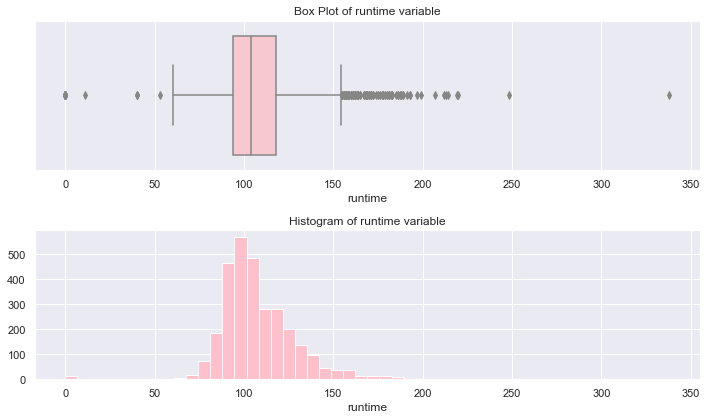

In [165]:
f, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['runtime'], ax = ax[0], color='pink')
ax[0].set_title("Box Plot of runtime variable")
sns.distplot(a=df['runtime'], kde = False, ax = ax[1], color='pink', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of runtime variable")
f.tight_layout()

In [166]:
df.loc[df['runtime'].argmax(), ['title', 'runtime', 'revenue']]

title      Carlos
runtime     338.0
revenue    871279
Name: 1211, dtype: object

In [167]:
df['runtime'].nlargest(5)

1211    338.0
1922    248.0
523     220.0
1302    219.0
1914    214.0
Name: runtime, dtype: float64

In [168]:
df = df.drop(df['runtime'].argmax())

In [169]:
print(f"Number of films have 0 runtime: {sum(df['runtime'] == 0)}")

Number of films have 0 runtime: 12


In [170]:
median_runtime_higer_0 = df.loc[df['runtime'] > 0, 'runtime'].median()
df["runtime_processed"] = df["runtime"].mask(df["runtime"] == 0, median_runtime_higer_0)

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


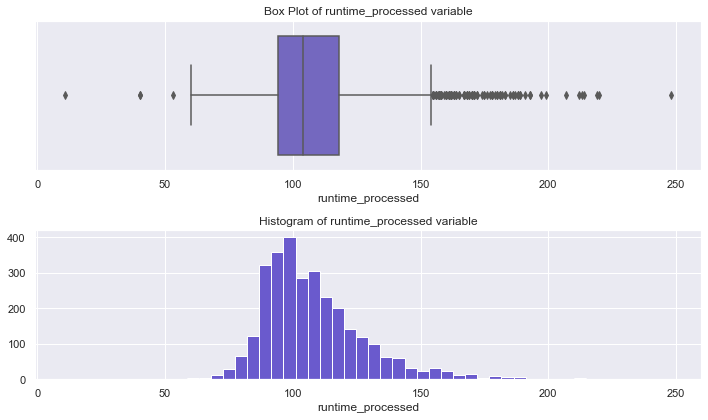

In [171]:
f, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.runtime_processed, ax = ax[0], color='slateblue')
ax[0].set_title("Box Plot of runtime_processed variable")
sns.distplot(a=df.runtime_processed, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of runtime_processed variable")
f.tight_layout()

In [172]:
# calculate Pearson's correlation
corr, _ = pearsonr(df['runtime_processed'], df['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.226


In [173]:
log_features.append('runtime_processed')

In [174]:
# Phân tích cột spoken_language
df['spoken_languages'].head(10)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
5             [{'iso_639_1': 'en', 'name': 'English'}]
6             [{'iso_639_1': 'en', 'name': 'English'}]
7    [{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...
8             [{'iso_639_1': 'en', 'name': 'English'}]
9             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [176]:
# new column for a count of the number of spoken languages
df['spoken_languages'] = df['spoken_languages'].fillna("")
df['spoken_languages_reform'] = df['spoken_languages'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
df['num_languages'] = df['spoken_languages_reform'].apply(lambda x: len(x))
print(df['num_languages'])

0       1
1       1
2       1
3       2
4       1
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: num_languages, Length: 2999, dtype: int64


In [177]:
print(df['num_languages'].describe())

count    2999.000000
mean        1.440814
std         0.872691
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: num_languages, dtype: float64


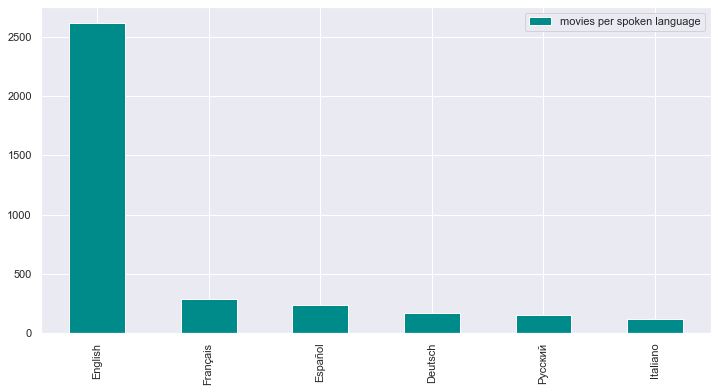

In [178]:
languagesDict = {}
for element in df["spoken_languages_reform"].values:
    for name in element:
        if name not in languagesDict:
            languagesDict[name] = 1
        else:
            languagesDict[name] += 1
            
sns.set(rc={'figure.figsize':(12,6)})
            
languages_df = pd.DataFrame.from_dict(languagesDict, orient='index', columns=["movies per spoken language"])
languages_df.sort_values(by="movies per spoken language", ascending=False).head(6).plot.bar(color='darkcyan')

languages_df.columns = ["number_of_languages"]

In [179]:
df['released_in_english'] = df['spoken_languages_reform'].apply(lambda x: 1 if 'English' in x else 0)

In [180]:
df['released_in_english'].value_counts()

1    2617
0     382
Name: released_in_english, dtype: int64

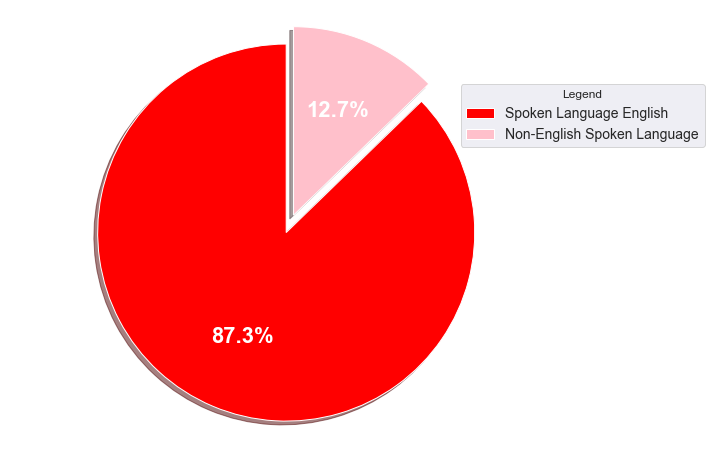

In [181]:
lang = [df['released_in_english'].value_counts()[1], df['released_in_english'].value_counts()[0]]

labels = 'Spoken Language English', 'Non-English Spoken Language'
explode = (0.1, 0)

# plot
colors = ["red", "pink"]

fig, ix = plt.subplots(figsize=(10, 8))
ix.pie(lang, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize':22, 'weight':"bold"})
ix.axis('equal')

ix.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

1    2617
0     382
Name: released_in_english, dtype: int64


[Text(0, 0, 'Non-English Spoken Language'),
 Text(1, 0, 'Spoken Language English')]

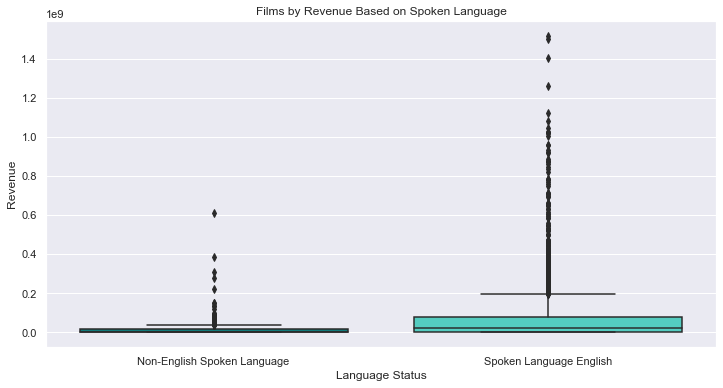

In [182]:
print(df['released_in_english'].value_counts())

labels = 'Non-English Spoken Language', 'Spoken Language English'

pal2 = ["darkcyan", "turquoise"]

fig, ix = plt.subplots(figsize=(12, 6))
sns.boxplot(x='released_in_english', y='revenue', data=df, palette=pal2)
plt.title('Films by Revenue Based on Spoken Language')
plt.ylabel("Revenue")
plt.xlabel("Language Status")

ix.set_xticklabels(labels)

In [183]:
corr, _ = pearsonr(df['released_in_english'], df['revenue'])
print('Pearsons correlation between released_in_english and revenue: %.3f' % corr)

Pearsons correlation between released_in_english and revenue: 0.135


In [184]:
corr, _ = pearsonr(df['num_languages'], df['revenue'])
print('Pearsons correlation between num_languages and revenue: %.3f' % corr)

Pearsons correlation between num_languages and revenue: 0.067


In [185]:
train_features.append('released_in_english')
log_features.append('num_languages')

In [186]:
# Phân tích cột status

print(df['status'].value_counts())

Released    2995
Rumored        4
Name: status, dtype: int64


In [187]:
drop_cols.append('status')

In [188]:
# Phân tích cột tagline
df['tagline'].head(5)

0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
Name: tagline, dtype: object

In [189]:
print(f"Missing values of tagline is {df['tagline'].isna().sum()}")

Missing values of tagline is 597


In [190]:
df['tagline'] = df['tagline'].astype('string')
df['tagline'] = df['tagline'].fillna('')
df['has_tagline'] = df['tagline'].apply(lambda x: 1 if x != "" else 0)

In [191]:
df['has_tagline'].value_counts()

1    2402
0     597
Name: has_tagline, dtype: int64

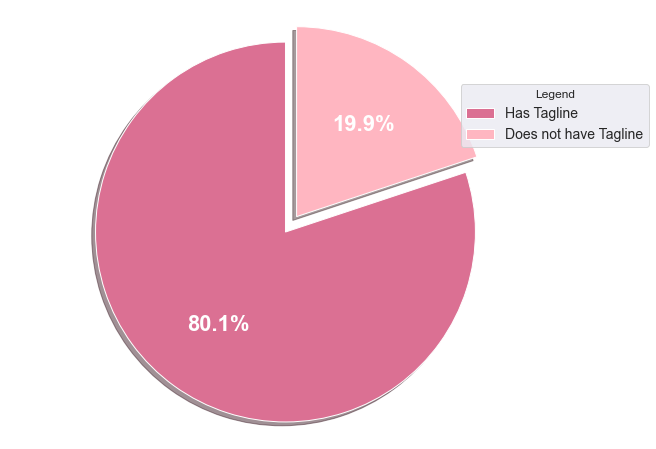

In [192]:
labels = 'Has Tagline', 'Does not have Tagline'
btc = [df['has_tagline'].value_counts()[1], df['has_tagline'].value_counts()[0]]
explode = (0.1, 0)

colors = ['palevioletred', 'lightpink']

# plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(btc, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal')

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

[Text(0, 0, 'Does not have tagline'), Text(1, 0, 'Has tagline')]

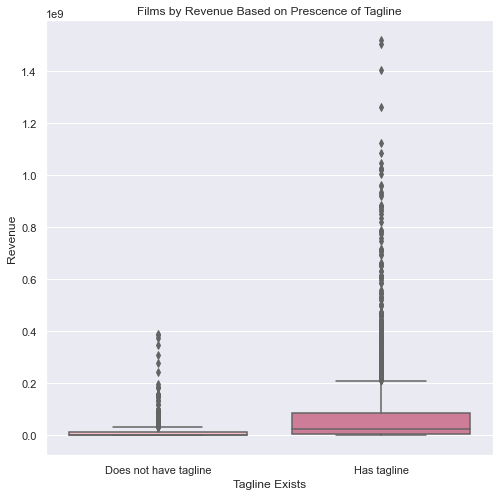

In [193]:
pal = ['lightpink', 'palevioletred']

sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.boxplot(x='has_tagline', y='revenue', data=df, palette=pal)
plt.title('Films by Revenue Based on Prescence of Tagline')
plt.ylabel("Revenue")
plt.xlabel("Tagline Exists")
labels = 'Does not have tagline', 'Has tagline'
ax.set_xticklabels(labels)

In [194]:
corr, _ = pearsonr(df['has_tagline'], df['revenue'])
print('Pearsons correlation between has_tagline and revenue: %.3f' % corr)

Pearsons correlation between has_tagline and revenue: 0.180


In [195]:
train_features.append('has_tagline')

In [196]:
# Phân tích cột title
print(f"Missing values of title is {df['title'].isna().sum()}")

Missing values of title is 0


In [197]:
df['title'].fillna('')
df['title_len'] = df['title'].apply(lambda x: len(str(x)))

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


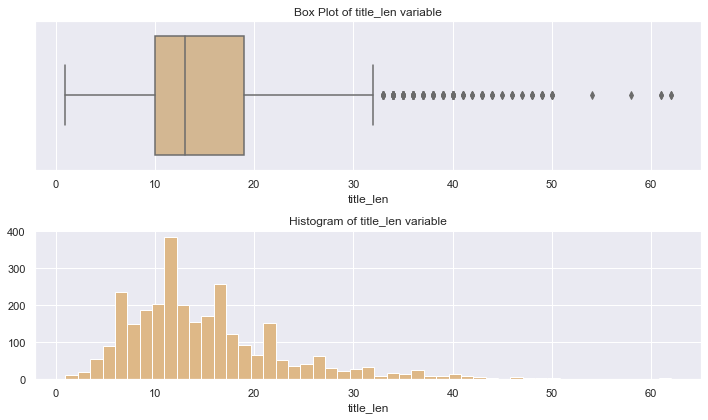

In [198]:
f, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.title_len, ax = ax[0], color='burlywood')
ax[0].set_title("Box Plot of title_len variable")
sns.distplot(a=df.title_len, kde = False, ax = ax[1], color='burlywood', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of title_len variable")
f.tight_layout()

In [199]:
corr, _ = pearsonr(df['title_len'], df['revenue'])
print('Pearsons correlation between title_len and revenue: %.3f' % corr)

Pearsons correlation between title_len and revenue: 0.110


In [200]:
log_features.append('title_len')

In [201]:
# Phân tích cột keywords
print(f"Missing values keywords is {df['Keywords'].isna().sum()}")

Missing values keywords is 276


In [202]:
df['Keywords'] = df['Keywords'].astype('string')
df['Keywords'] = df['Keywords'].fillna('')

In [203]:
df['has_keywords'] = df['Keywords'].apply(lambda x: 1 if x != "" else 0)

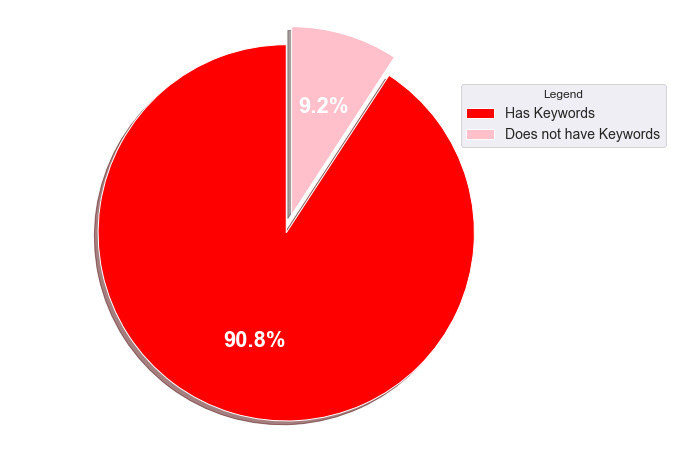

In [204]:
labels = 'Has Keywords', 'Does not have Keywords'
btc = [sum(df.has_keywords), (df.has_keywords == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['red', 'pink']

# plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(btc, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

[Text(0, 0, 'Does not have keywords'), Text(1, 0, 'Has keywords')]

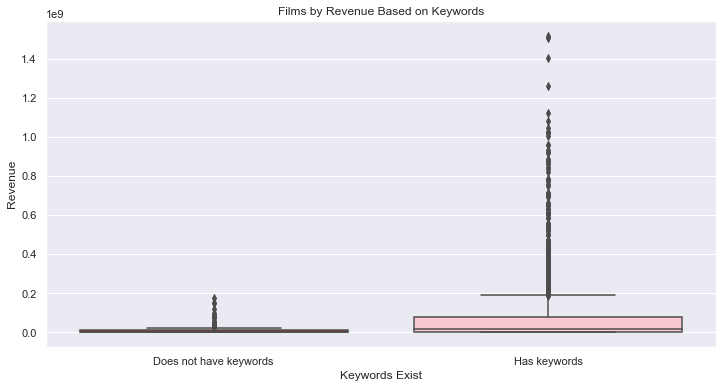

In [205]:
pal = ['red', 'pink']

sns.set(rc={'figure.figsize':(12, 6)})
ax = sns.boxplot(x='has_keywords', y='revenue', data=df, palette=pal)
plt.title('Films by Revenue Based on Keywords')
plt.ylabel("Revenue")
plt.xlabel("Keywords Exist")

labels = 'Does not have keywords', 'Has keywords'
ax.set_xticklabels(labels)

In [206]:
corr, _ = pearsonr(df['has_keywords'], df['revenue'])
print('Pearsons correlation between has_keywords and revenue: %.3f' % corr)

Pearsons correlation between has_keywords and revenue: 0.129


In [207]:
train_features.append('has_keywords')

In [208]:
# Phân tích cột cast
df['cast'].head(5)

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
Name: cast, dtype: object

In [209]:
#pre-processing
df['cast'] = df['cast'].fillna("")
df['cast_processed'] = df['cast'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

In [210]:
df['cast_processed']

0       [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1       [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2       [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3       [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4       [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
                              ...                        
2995    [Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...
2996    [Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...
2997    [Geena Davis, Samuel L. Jackson, Yvonne Zima, ...
2998    [Ben Stiller, Jennifer Aniston, Philip Seymour...
2999    [Taylor Lautner, Lily Collins, Alfred Molina, ...
Name: cast_processed, Length: 2999, dtype: object

In [211]:
df['num_cast'] = df['cast_processed'].apply(lambda x: len(x))
df['num_cast'].value_counts()

15     204
16     158
10     136
14     133
13     129
      ... 
120      1
77       1
79       1
85       1
92       1
Name: num_cast, Length: 105, dtype: int64

In [212]:
df['num_cast'].nsmallest(5)

233    0
518    0
680    0
773    0
906    0
Name: num_cast, dtype: int64

In [213]:
median_cast_higher_0 = df.loc[df['num_cast']> 0, 'num_cast'].median()
df["num_cast"] = df["num_cast"].mask(df["num_cast"] == 0, median_cast_higher_0)

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


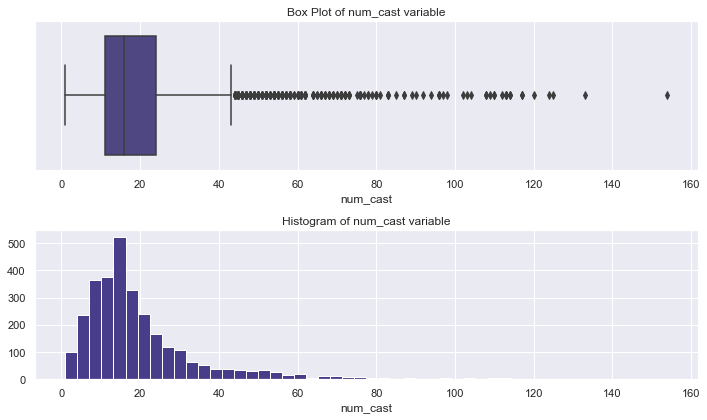

In [215]:
f, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.num_cast, ax = ax[0], color='darkslateblue')
ax[0].set_title("Box Plot of num_cast variable")
sns.distplot(a=df.num_cast, kde = False, ax = ax[1], color='darkslateblue', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of num_cast variable")
f.tight_layout()

<AxesSubplot:>

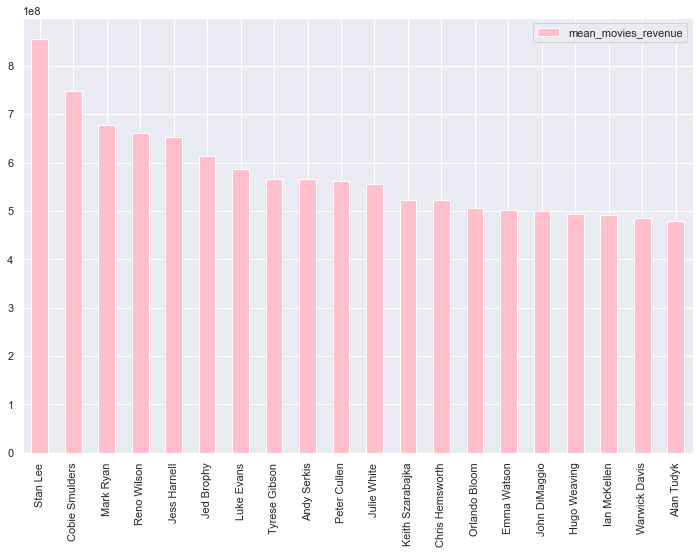

In [218]:
actorsDict = {}
for element in df[["revenue", "cast_processed"]].values:
    
    for actor in element[1]:
        if actor not in actorsDict:
            actorsDict[actor] = [element[0], 1]
        else:
            actorsDict[actor][0] += element[0]
            actorsDict[actor][1] += 1    

actorsDict = {k: v for k, v in actorsDict.items() if v[1] >= 5}

for actor in actorsDict:
    actorsDict[actor][0] = actorsDict[actor][0]/actorsDict[actor][1]
    actorsDict[actor] = actorsDict[actor][0]


    
    
actors_df = pd.DataFrame.from_dict(actorsDict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar(color='pink')

<AxesSubplot:>

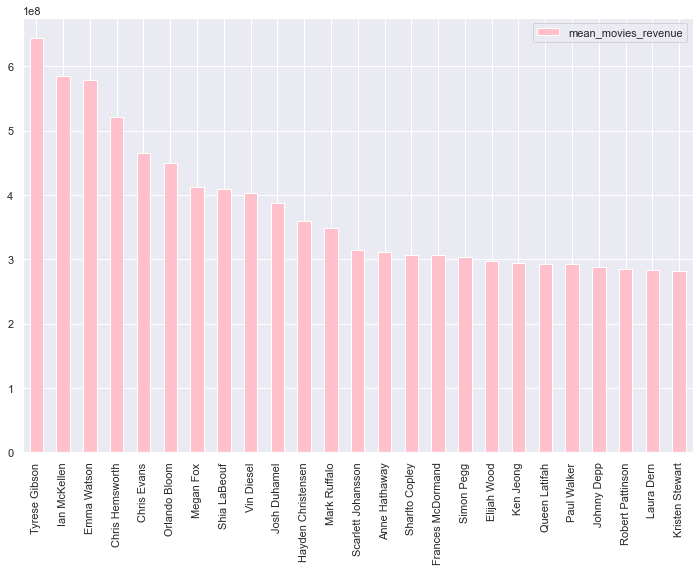

In [220]:
#cast

actorsDict = {}
for element in df[["revenue", "cast_processed"]].values:
    temp = 5
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in actorsDict:
            actorsDict[element[1][i]] = [element[0], 1]
        else:
            actorsDict[element[1][i]][0] += element[0]
            actorsDict[element[1][i]][1] += 1    

actorsDict = {k: v for k, v in actorsDict.items() if v[1] >= 5}

for actor in actorsDict:
    actorsDict[actor][0] = actorsDict[actor][0]/actorsDict[actor][1]
    actorsDict[actor] = actorsDict[actor][0]


    
    
actors_df = pd.DataFrame.from_dict(actorsDict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='pink')

<AxesSubplot:>

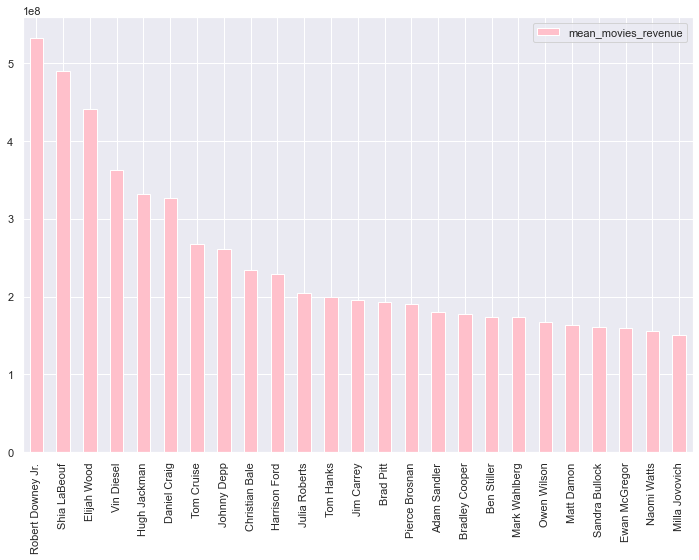

In [221]:
leadActorsDict = {}
for element in df[["revenue", "cast_processed"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in leadActorsDict:
        leadActorsDict[element[1][0]] = [element[0], 1]
    else:
        leadActorsDict[element[1][0]][0] += element[0]
        leadActorsDict[element[1][0]][1] += 1 

leadActorsDict = {k: v for k, v in leadActorsDict.items() if v[1] >= 5}

for actor in leadActorsDict:
    leadActorsDict[actor][0] = leadActorsDict[actor][0]/leadActorsDict[actor][1]
    leadActorsDict[actor] = leadActorsDict[actor][0]


    
    
actors_df = pd.DataFrame.from_dict(leadActorsDict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='pink')

In [222]:
leadActorsDict = {k: v for k, v in sorted(leadActorsDict.items(), key=lambda item: item[1], reverse = True)}
actorsDict = {k: v for k, v in sorted(actorsDict.items(), key=lambda item: item[1], reverse = True)}

In [223]:
def checkLeadActor(cast):
    if len(cast) < 1 or cast[0] not in list(leadActorsDict)[:50]:
        return 0
    else:
        return 1

In [224]:
def checkTopActors(cast):
    if len(cast) < 1:
        return 0
    count = 0
    for actor in cast[:10]:
        if actor in list(actorsDict)[:100]:
            count += 1
    return count

In [225]:
def getActorRanks(cast):
    if len(cast) < 1:
        return len(actorsDict)
    rank = 0
    for a in cast[:5]:
        if a in list(actorsDict):
            rank += list(actorsDict.keys()).index(a)
    if rank == 0:
        rank = len(actorsDict)
    return rank / len(cast)

In [226]:
def getTopActorRank(cast):
    if len(cast) < 1:
        return len(leadActorsDict)
    if cast[0] in list(leadActorsDict):
        rank = list(leadActorsDict.keys()).index(cast[0])
    else:
        rank = len(leadActorsDict)
    return rank

In [227]:
df['topLeadActor'] = df['cast_processed'].apply(lambda x: checkLeadActor(x))
df['numTopActors'] = df['cast_processed'].apply(lambda x: checkTopActors(x))
df['actorRanks'] = df['cast_processed'].apply(lambda x: getActorRanks(x))
df['topActorRank'] = df['cast_processed'].apply(lambda x: getTopActorRank(x))

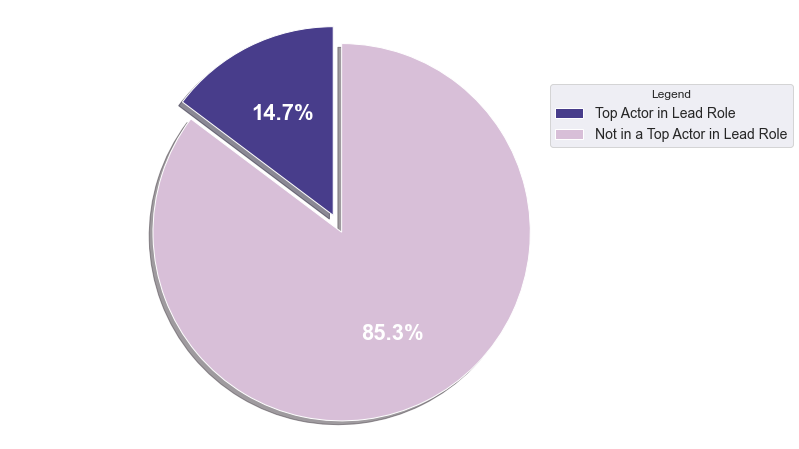

In [228]:
labels = 'Top Actor in Lead Role', 'Not in a Top Actor in Lead Role'
btc_1 = [sum(df.topLeadActor), (df.topLeadActor == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['darkslateblue', 'thistle']

fig, ax = plt.subplots()
plt.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
plt.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))


plt.show()

<AxesSubplot:xlabel='numTopActors', ylabel='count'>

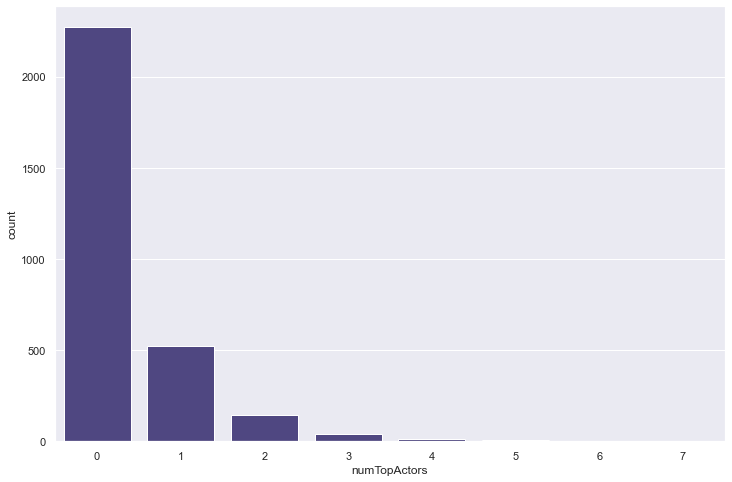

In [229]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=df['numTopActors'], color='darkslateblue')

[Text(0, 0, 'Has a Top Leading Actor'),
 Text(1, 0, 'Does not have a Top Leading Actor')]

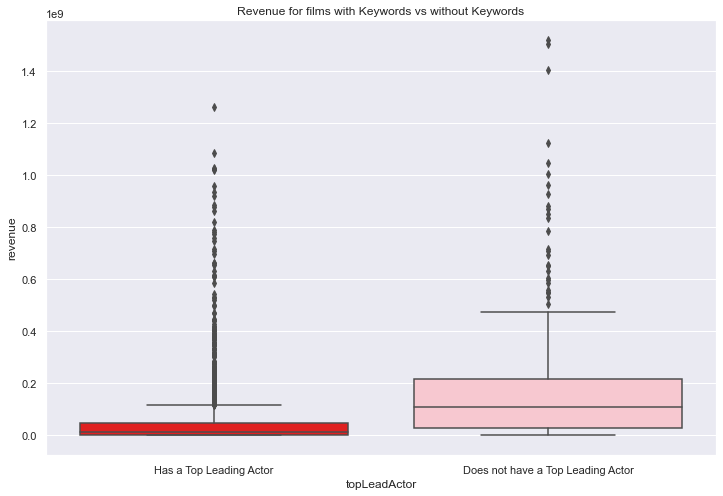

In [231]:
pal = ['red', 'pink']

ax = sns.boxplot(x='topLeadActor', y='revenue', data=df, palette=pal);
plt.title('Revenue for films with Keywords vs without Keywords');

labels = 'Has a Top Leading Actor', 'Does not have a Top Leading Actor'
ax.set_xticklabels(labels)

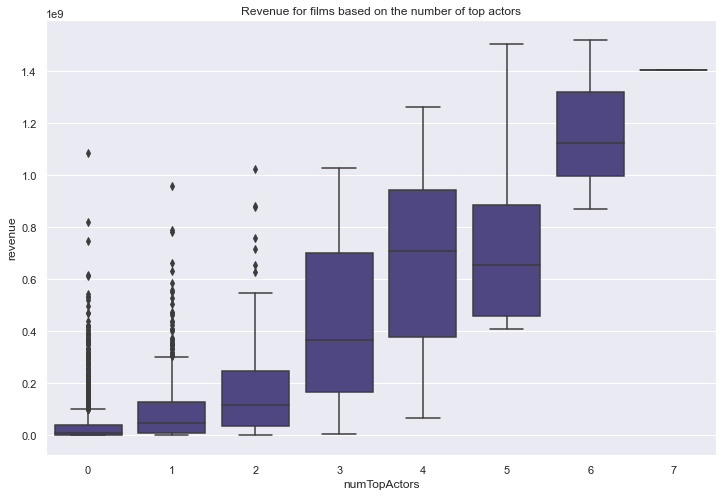

In [232]:
sns.boxplot(x='numTopActors', y='revenue', data=df, color='darkslateblue');
plt.title('Revenue for films based on the number of top actors');

In [233]:
corr, _ = pearsonr(df['num_cast'], df['revenue'])
print('Pearsons correlation between num_cast and revenue: %.3f' % corr)

corr, _ = pearsonr(df['topLeadActor'], df['revenue'])
print('Pearsons correlation between topLeadActor and revenue: %.3f' % corr)

corr, _ = pearsonr(df['numTopActors'], df['revenue'])
print('Pearsons correlation between numTopActors and revenue: %.3f' % corr)

corr, _ = pearsonr(df['actorRanks'], df['revenue'])
print('Pearsons correlation between actorRanks and revenue: %.3f' % corr)

corr, _ = pearsonr(df['topActorRank'], df['revenue'])
print('Pearsons correlation between topActorRank and revenue: %.3f' % corr)

Pearsons correlation between num_cast and revenue: 0.345
Pearsons correlation between topLeadActor and revenue: 0.314
Pearsons correlation between numTopActors and revenue: 0.578
Pearsons correlation between actorRanks and revenue: -0.115
Pearsons correlation between topActorRank and revenue: -0.323


In [234]:
log_features.append('num_cast')
train_features.append('topLeadActor')
log_features.append('numTopActors')
log_features.append('actorRanks')
log_features.append('topActorRank')

In [235]:
# Phân tích cột crew

df['crew'].head(5)

0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
Name: crew, dtype: object

In [236]:
# pre-processing
df['crew'] = df['crew'].fillna("")
df['crew_processed'] = df['crew'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

In [237]:
df['crew_processed'].head(10)

0    [Kelly Cantley, Steve Pink, Josh Heald, Josh H...
1    [Garry Marshall, Charles Minsky, John Debney, ...
2    [Terri Taylor, Richard Henderson, Jeffrey Stot...
3              [Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]
4                     [Jong-seok Yoon, Jong-seok Yoon]
5    [Collodi, Hal Sutherland, Robby London, Robby ...
6    [Sam Raimi, Nancy Nayor, Anders Villadsen, Eri...
7                                     [Jehane Noujaim]
8    [Brian Henson, Frank Oz, Brian Henson, Jerry J...
9    [Christopher Guest, Christopher Guest, Eugene ...
Name: crew_processed, dtype: object

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


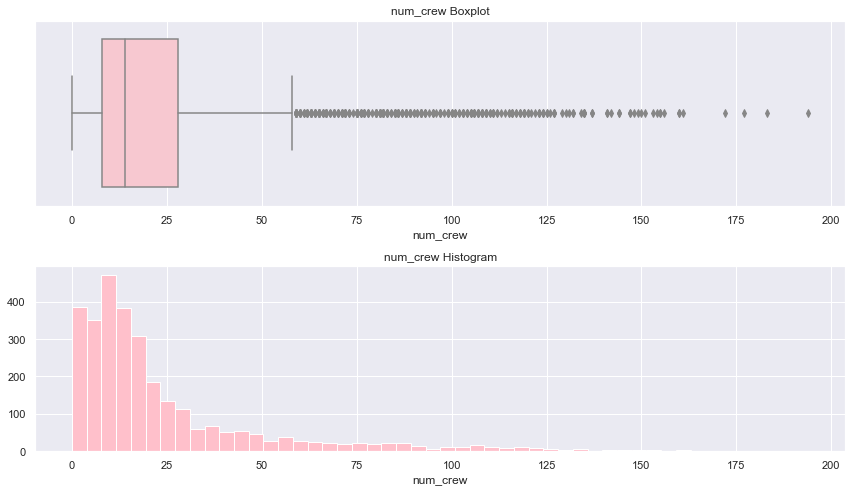

In [238]:
# new feature for a count of the number of crew
df['crew']= df['crew'].fillna("")
df["num_crew"] = df["crew"].str.count("'job")


f, ax = plt.subplots(2, figsize=(12,7))

# plot
sns.boxplot(x=df['num_crew'], ax = ax[0], color='pink')
ax[0].set_title("num_crew Boxplot")

sns.distplot(a=df['num_crew'], kde = False, ax = ax[1], color='pink', hist_kws=dict(alpha=1))
ax[1].set_title("num_crew Histogram")


f.tight_layout()

In [239]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['num_crew'], df['revenue'])
print('Pearsons correlation between num_crew and revenue: %.3f' % corr)

Pearsons correlation between num_crew and revenue: 0.372


In [240]:
log_features.append('num_crew')

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


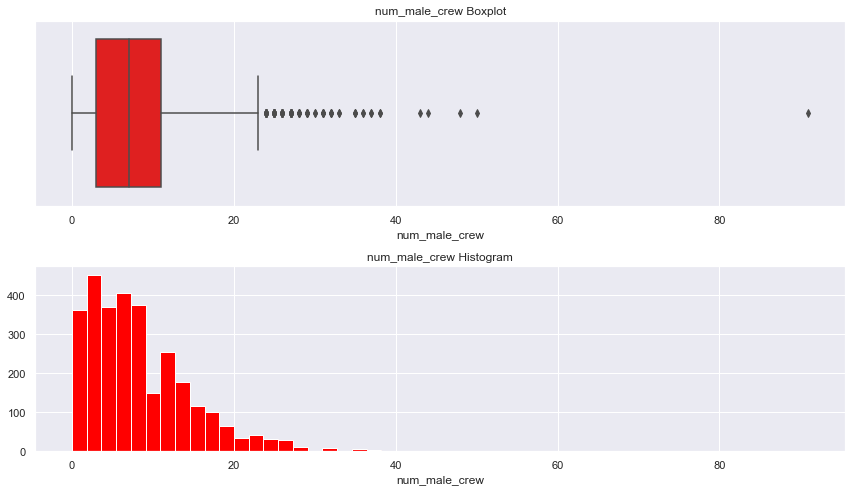

In [241]:
df["num_male_crew"] = df["crew"].str.count("'gender': 2")

f, ax = plt.subplots(2, figsize=(12,7))

df["num_male_crew"] = df["num_male_crew"].fillna(0)

# plot
sns.boxplot(x=df["num_male_crew"], ax = ax[0], color='red')
ax[0].set_title("num_male_crew Boxplot")

sns.distplot(a=df["num_male_crew"], kde = False, ax = ax[1], color='red', hist_kws=dict(alpha=1))
ax[1].set_title("num_male_crew Histogram")

f.tight_layout()

In [242]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['num_male_crew'], df['revenue'])
print('Pearsons correlation between num_male_crew and revenue: %.3f' % corr)

Pearsons correlation between num_male_crew and revenue: 0.383


In [243]:
log_features.append('num_male_crew')

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


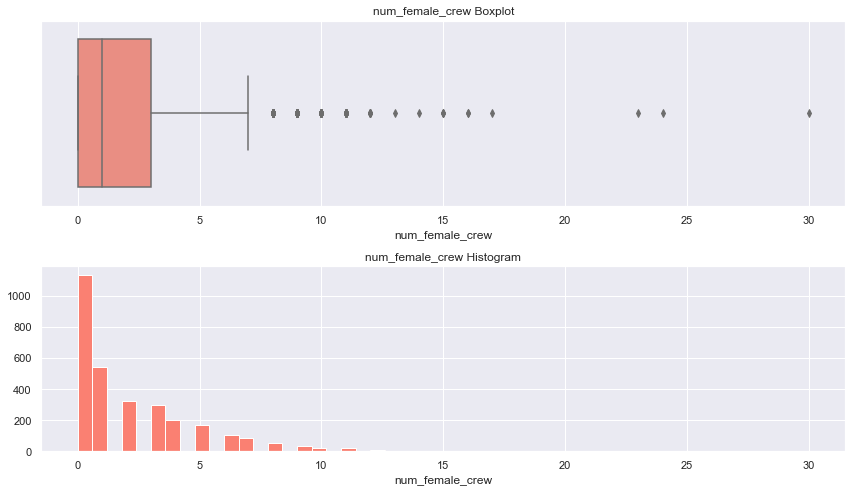

In [244]:
# female crew
df["num_female_crew"] = df["crew"].str.count("'gender': 1")

f, ax = plt.subplots(2, figsize=(12,7))

df["num_female_crew"] = df["num_female_crew"].fillna(0)

# plot
sns.boxplot(x=df["num_female_crew"], ax = ax[0], color='salmon')
ax[0].set_title("num_female_crew Boxplot")

sns.distplot(a=df["num_female_crew"], kde = False, ax = ax[1], color='salmon', hist_kws=dict(alpha=1))
ax[1].set_title("num_female_crew Histogram")


f.tight_layout()

In [245]:
corr, _ = pearsonr(df['num_female_crew'], df['revenue'])
print('Pearsons correlation between num_female_crew and revenue: %.3f' % corr)

Pearsons correlation between num_female_crew and revenue: 0.267


In [246]:
log_features.append('num_female_crew')

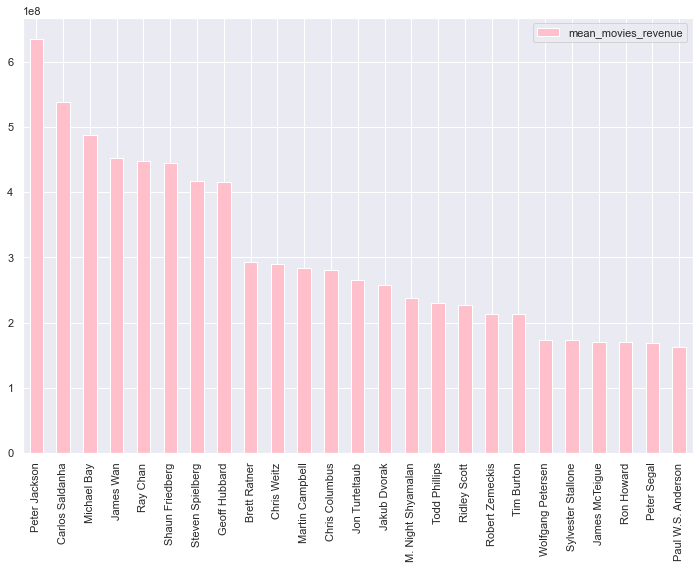

In [247]:
# Directors
df['directors'] = df['crew'].apply(lambda x: re.findall("Director', 'name': '(.+?)'", x))

directorsDict = {}
for element in df[["revenue", "directors"]].values:

    for director in element[1]:
        if director not in directorsDict:
            directorsDict[director] = [element[0], 1]
        else:
            directorsDict[director][0] += element[0]
            directorsDict[director][1] += 1

directorsDict = {k: v for k, v in directorsDict.items() if v[1] >= 5}

for director in directorsDict:
    directorsDict[director][0] = directorsDict[director][0]/directorsDict[director][1]
    directorsDict[director] = directorsDict[director][0]

    
directors_df = pd.DataFrame.from_dict(directorsDict, orient='index', columns=["mean_movies_revenue"])
directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='pink')

directors_df.columns = ["number_of_directors"]

<AxesSubplot:>

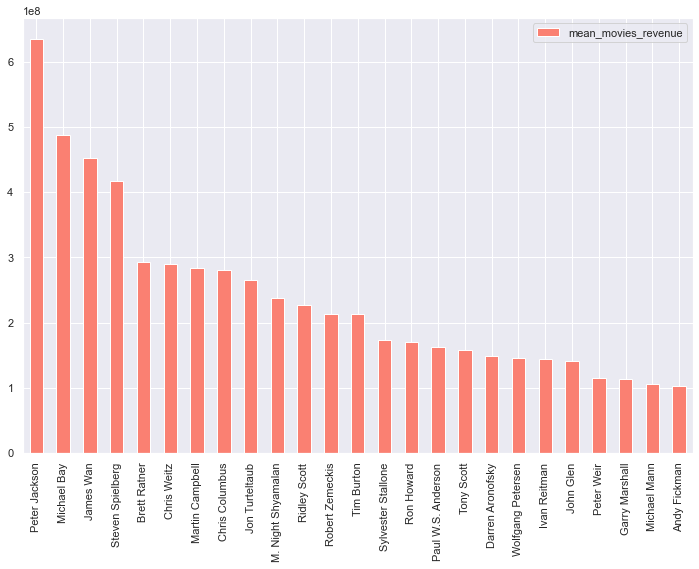

In [248]:
leadDirectorsDict = {}
for element in df[["revenue", "directors"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in leadDirectorsDict:
        leadDirectorsDict[element[1][0]] = [element[0], 1]
    else:
        leadDirectorsDict[element[1][0]][0] += element[0]
        leadDirectorsDict[element[1][0]][1] += 1    

leadDirectorsDict = {k: v for k, v in leadDirectorsDict.items() if v[1] >= 5}

for director in leadDirectorsDict:
    leadDirectorsDict[director][0] = leadDirectorsDict[director][0]/leadDirectorsDict[director][1]
    leadDirectorsDict[director] = leadDirectorsDict[director][0]


    
    
directors_df = pd.DataFrame.from_dict(leadDirectorsDict, orient='index', columns=["mean_movies_revenue"])
directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [249]:
leadDirectorsDict = {k: v for k, v in sorted(leadDirectorsDict.items(), key=lambda item: item[1], reverse = True)}
directorsDict = {k: v for k, v in sorted(directorsDict.items(), key=lambda item: item[1], reverse = True)}

In [251]:
def checkTopDirectors(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(directorsDict)[:100]:
            count += 1
    return count

In [252]:
def getDirectorRank(crew):
    if len(crew) < 1:
        return len(directorsDict)
    rank = 0
    for c in crew[:5]:
        if c in list(directorsDict):
            rank += list(directorsDict.keys()).index(c)
    if rank == 0:
        rank = len(directorsDict)
    return rank / len(crew)

In [253]:
def checkLeadDirector(crew):
    if len(crew) < 1 or crew[0] not in list(leadDirectorsDict)[:25]:
        return 0
    else:
        return 1

In [254]:
df['topLeadDirector'] = df['directors'].apply(lambda x: checkLeadDirector(x))
df['numTopDirectors'] = df['directors'].apply(lambda x: checkTopDirectors(x))
df['directorsRank'] = df['directors'].apply(lambda x: getDirectorRank(x))

<AxesSubplot:>

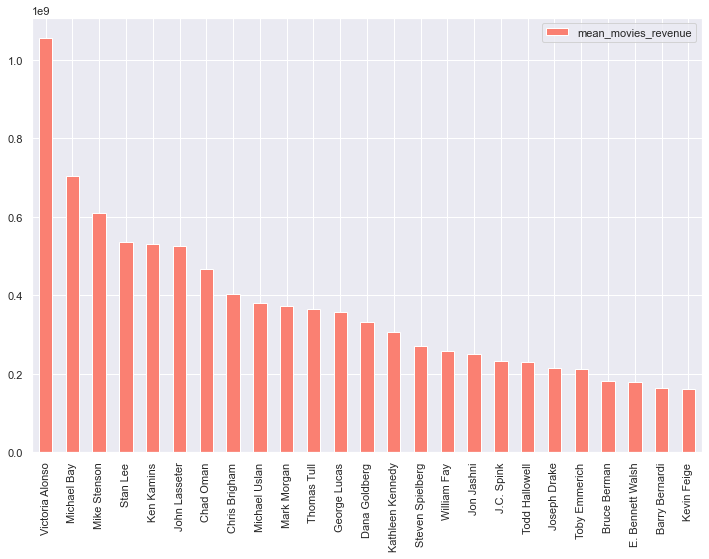

In [255]:
# Executive Producers
df['exec_producers'] = df['crew'].apply(lambda x: re.findall("Executive Producer', 'name': '(.+?)'", x))

exec_producersDict = {}
for element in df[["revenue", "exec_producers"]].values:

    for exec_producer in element[1]:
        if exec_producer not in exec_producersDict:
            exec_producersDict[exec_producer] = [element[0], 1]
        else:
            exec_producersDict[exec_producer][0] += element[0]
            exec_producersDict[exec_producer][1] += 1

exec_producersDict = {k: v for k, v in exec_producersDict.items() if v[1] >= 5}

for exec_producer in exec_producersDict:
    exec_producersDict[exec_producer][0] = exec_producersDict[exec_producer][0]/exec_producersDict[exec_producer][1]
    exec_producersDict[exec_producer] = exec_producersDict[exec_producer][0]




exec_producers_df = pd.DataFrame.from_dict(exec_producersDict, orient='index', columns=["mean_movies_revenue"])
exec_producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<AxesSubplot:>

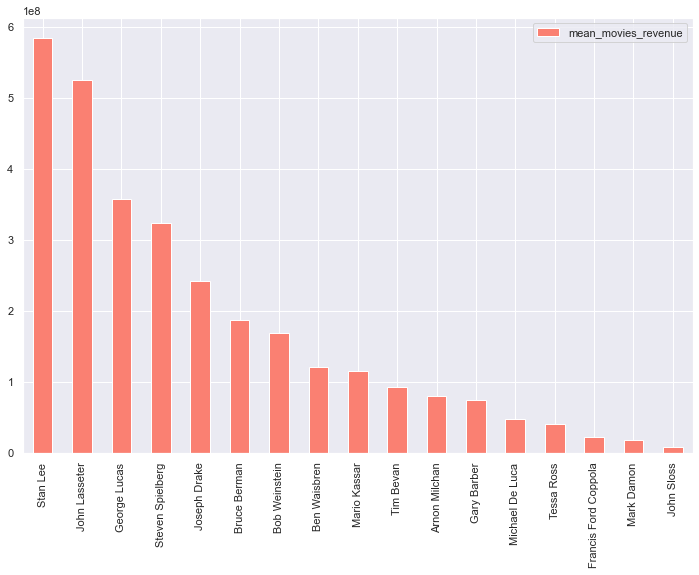

In [257]:
leadExecProdDict = {}
for element in df[["revenue", "exec_producers"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in leadExecProdDict:
        leadExecProdDict[element[1][0]] = [element[0], 1]
    else:
        leadExecProdDict[element[1][0]][0] += element[0]
        leadExecProdDict[element[1][0]][1] += 1    

leadExecProdDict = {k: v for k, v in leadExecProdDict.items() if v[1] >= 5}

for exec_producer in leadExecProdDict:
    leadExecProdDict[exec_producer][0] = leadExecProdDict[exec_producer][0]/leadExecProdDict[exec_producer][1]
    leadExecProdDict[exec_producer] = leadExecProdDict[exec_producer][0]


    
    
exec_producers_df = pd.DataFrame.from_dict(leadExecProdDict, orient='index', columns=["mean_movies_revenue"])
exec_producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [258]:
def checkLeadExecProd(crew):
    if len(crew) < 1 or crew[0] not in list(leadExecProdDict)[:25]:
        return 0
    else:
        return 1

In [259]:
def checkTopExecProd(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(exec_producersDict)[:100]:
            count += 1
    return count

In [260]:
def getExecProdRank(crew):
    if len(crew) < 1:
        return len(exec_producersDict)
    rank = 0
    for c in crew[:5]:
        if c in list(exec_producersDict):
            rank += list(exec_producersDict.keys()).index(c)
    if rank == 0:
        rank = len(exec_producersDict)
    return rank / len(crew)

In [261]:
df['topLeadExecProd'] = df['exec_producers'].apply(lambda x: checkLeadExecProd(x))
df['numTopExecProd'] = df['exec_producers'].apply(lambda x: checkTopExecProd(x))
df['execProdRank'] = df['exec_producers'].apply(lambda x: getExecProdRank(x))

<AxesSubplot:>

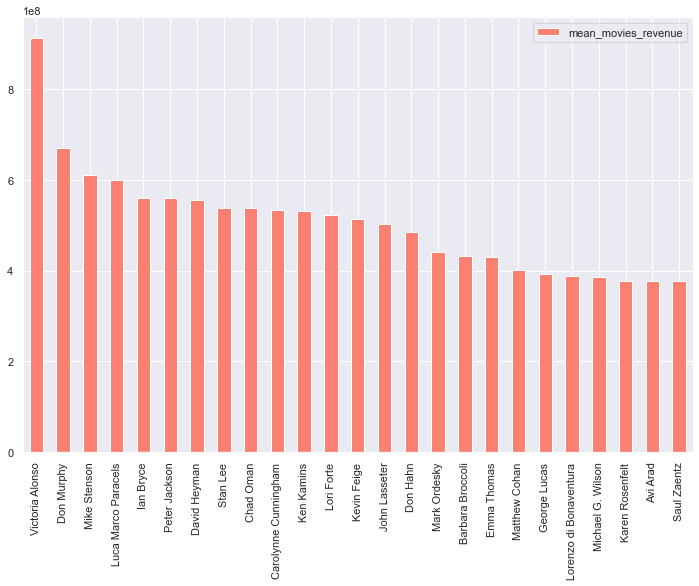

In [262]:
# producers
df['producers'] = df['crew'].apply(lambda x: re.findall("Producer', 'name': '(.+?)'", x))

producersDict = {}
for element in df[["revenue", "producers"]].values:

    for producer in element[1]:
        if producer not in producersDict:
            producersDict[producer] = [element[0], 1]
        else:
            producersDict[producer][0] += element[0]
            producersDict[producer][1] += 1

producersDict = {k: v for k, v in producersDict.items() if v[1] >= 5}

for producer in producersDict:
    producersDict[producer][0] = producersDict[producer][0]/producersDict[producer][1]
    producersDict[producer] = producersDict[producer][0]




producers_df = pd.DataFrame.from_dict(producersDict, orient='index', columns=["mean_movies_revenue"])
producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<AxesSubplot:>

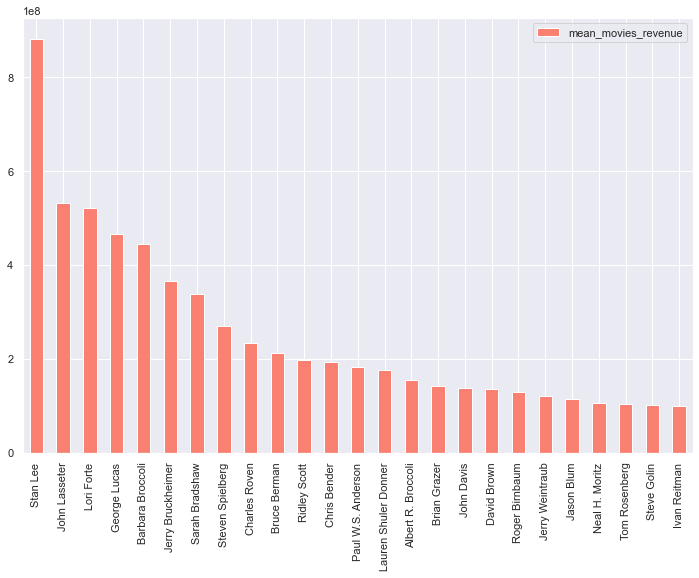

In [264]:
leadProducerDict = {}
for element in df[["revenue", "producers"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in leadProducerDict:
        leadProducerDict[element[1][0]] = [element[0], 1]
    else:
        leadProducerDict[element[1][0]][0] += element[0]
        leadProducerDict[element[1][0]][1] += 1    

leadProducerDict = {k: v for k, v in leadProducerDict.items() if v[1] >= 5}

for producer in leadProducerDict:
    leadProducerDict[producer][0] = leadProducerDict[producer][0]/leadProducerDict[producer][1]
    leadProducerDict[producer] = leadProducerDict[producer][0]


    
    
producers_df = pd.DataFrame.from_dict(leadProducerDict, orient='index', columns=["mean_movies_revenue"])
producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [265]:
leadProducerDict = {k: v for k, v in sorted(leadProducerDict.items(), key=lambda item: item[1], reverse = True)}
producersDict = {k: v for k, v in sorted(producersDict.items(), key=lambda item: item[1], reverse = True)}


def checkLeadProducer(crew):
    if len(crew) < 1 or crew[0] not in list(leadProducerDict)[:25]:
        return 0
    else:
        return 1

def checkTopProducers(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for producer in crew[:5]:
        if producer in list(producersDict)[:100]:
            count += 1
    return count


def getProducerRank(crew):
    if len(crew) < 1:
        return len(producersDict)
    rank = 0
    for c in crew[:5]:
        if c in list(producersDict):
            rank += list(producersDict.keys()).index(c)
    if rank == 0:
        rank = len(producersDict)
    return rank / len(crew)

In [266]:
df['topLeadProducer'] = df['producers'].apply(lambda x: checkLeadProducer(x))

df['numTopProducers'] = df['producers'].apply(lambda x: checkTopProducers(x))

df['producersRank'] = df['producers'].apply(lambda x: getProducerRank(x))

<AxesSubplot:>

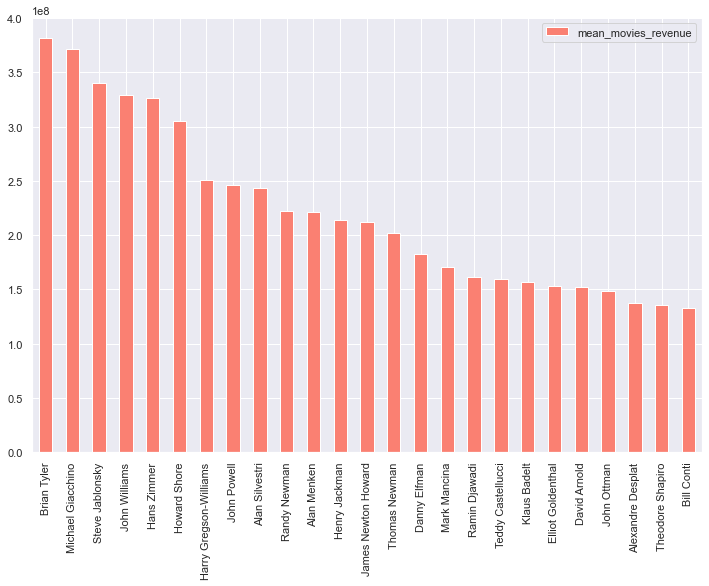

In [267]:
# Composers
df['composers'] = df['crew'].apply(lambda x: re.findall("Composer', 'name': '(.+?)'", x))

composersDict = {}
for element in df[["revenue", "composers"]].values:

    for composer in element[1]:
        if composer not in composersDict:
            composersDict[composer] = [element[0], 1]
        else:
            composersDict[composer][0] += element[0]
            composersDict[composer][1] += 1

composersDict = {k: v for k, v in composersDict.items() if v[1] >= 5}

for composer in composersDict:
    composersDict[composer][0] = composersDict[composer][0]/composersDict[composer][1]
    composersDict[composer] = composersDict[composer][0]




composers_df = pd.DataFrame.from_dict(composersDict, orient='index', columns=["mean_movies_revenue"])
composers_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<AxesSubplot:>

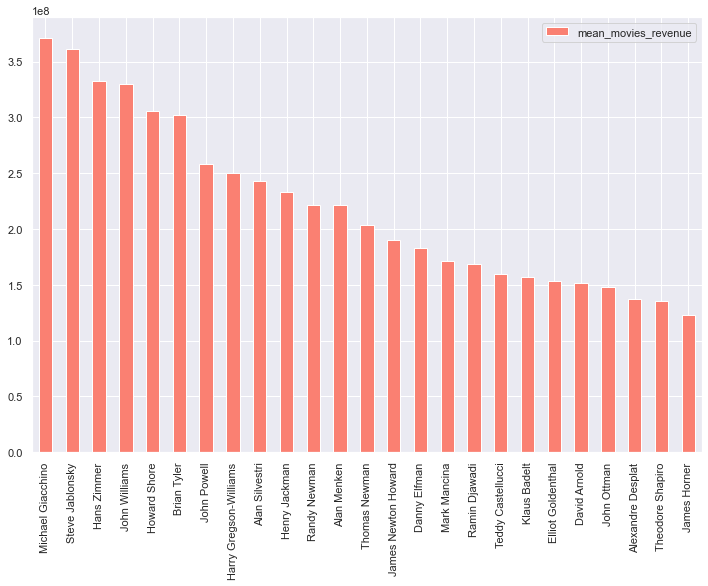

In [268]:
leadComposerDict = {}
for element in df[["revenue", "composers"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in leadComposerDict:
        leadComposerDict[element[1][0]] = [element[0], 1]
    else:
        leadComposerDict[element[1][0]][0] += element[0]
        leadComposerDict[element[1][0]][1] += 1

leadComposerDict = {k: v for k, v in leadComposerDict.items() if v[1] >= 5}

for composer in leadComposerDict:
    leadComposerDict[composer][0] = leadComposerDict[composer][0]/leadComposerDict[composer][1]
    leadComposerDict[composer] = leadComposerDict[composer][0]


    
    
composers_df = pd.DataFrame.from_dict(leadComposerDict, orient='index', columns=["mean_movies_revenue"])
composers_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [269]:
# Sort both of our dicts
leadComposerDict = {k: v for k, v in sorted(leadComposerDict.items(), key=lambda item: item[1], reverse = True)}
composersDict = {k: v for k, v in sorted(composersDict.items(), key=lambda item: item[1], reverse = True)}


def checkLeadComposer(crew):
    if len(crew) < 1 or crew[0] not in list(leadComposerDict)[:25]:
        return 0
    else:
        return 1

def checkTopComposers(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for composer in crew[:5]:
        if composer in list(composersDict)[:100]:
            count += 1
    return count

def getComposerRank(crew):
    if len(crew) < 1:
        return len(composersDict)
    rank = 0
    for c in crew[:5]:
        if c in list(composersDict):
            rank += list(composersDict.keys()).index(c)
    if rank == 0:
        rank = len(composersDict)
    return rank / len(crew)

In [270]:
df['topLeadComposer'] = df['composers'].apply(lambda x: checkLeadComposer(x))

df['numTopComposers'] = df['composers'].apply(lambda x: checkTopComposers(x))

df['composersRank'] = df['composers'].apply(lambda x: getComposerRank(x))

<AxesSubplot:>

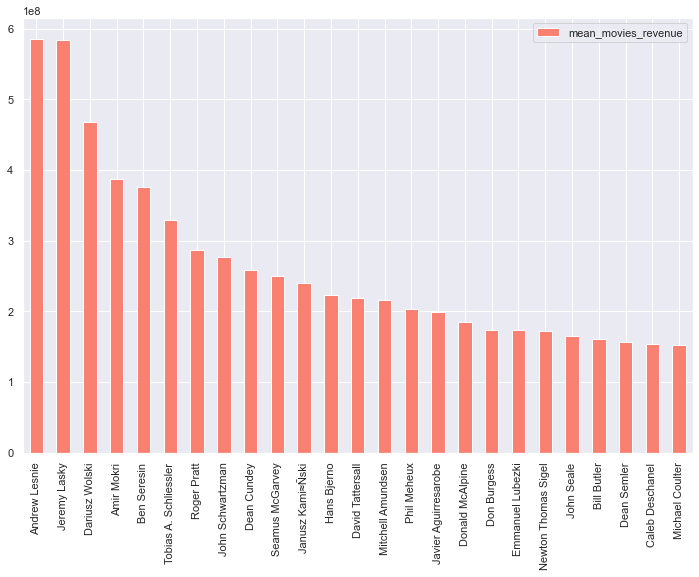

In [271]:
# Director of Photography
df['director_photos'] = df['crew'].apply(lambda x: re.findall("Director of Photography', 'name': '(.+?)'", x))

director_photosDict = {}
for element in df[["revenue", "director_photos"]].values:

    for director_photo in element[1]:
        if director_photo not in director_photosDict:
            director_photosDict[director_photo] = [element[0], 1]
        else:
            director_photosDict[director_photo][0] += element[0]
            director_photosDict[director_photo][1] += 1

director_photosDict = {k: v for k, v in director_photosDict.items() if v[1] >= 5}

for director_photo in director_photosDict:
    director_photosDict[director_photo][0] = director_photosDict[director_photo][0]/director_photosDict[director_photo][1]
    director_photosDict[director_photo] = director_photosDict[director_photo][0]




director_photos_df = pd.DataFrame.from_dict(director_photosDict, orient='index', columns=["mean_movies_revenue"])
director_photos_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<AxesSubplot:>

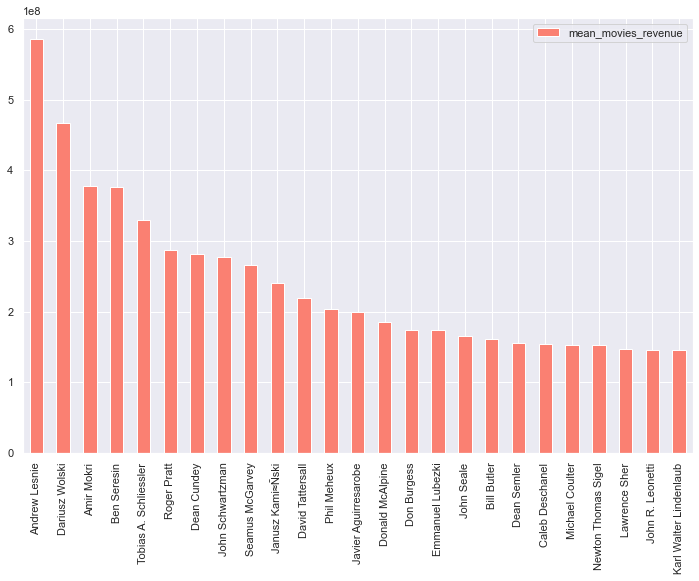

In [272]:
leadDirectorPhotoDict = {}
for element in df[["revenue", "director_photos"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in leadDirectorPhotoDict:
        leadDirectorPhotoDict[element[1][0]] = [element[0], 1]
    else:
        leadDirectorPhotoDict[element[1][0]][0] += element[0]
        leadDirectorPhotoDict[element[1][0]][1] += 1   

leadDirectorPhotoDict = {k: v for k, v in leadDirectorPhotoDict.items() if v[1] >= 5}

for director_photo in leadDirectorPhotoDict:
    leadDirectorPhotoDict[director_photo][0] = leadDirectorPhotoDict[director_photo][0]/leadDirectorPhotoDict[director_photo][1]
    leadDirectorPhotoDict[director_photo] = leadDirectorPhotoDict[director_photo][0]


    
    
director_photos_df = pd.DataFrame.from_dict(leadDirectorPhotoDict, orient='index', columns=["mean_movies_revenue"])
director_photos_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [273]:
leadDirectorPhotoDict = {k: v for k, v in sorted(leadDirectorPhotoDict.items(), key=lambda item: item[1], reverse = True)}
director_photosDict = {k: v for k, v in sorted(director_photosDict.items(), key=lambda item: item[1], reverse = True)}


def checkLeadDirectorPhoto(crew):
    if len(crew) < 1 or crew[0] not in list(leadDirectorPhotoDict)[:25]:
        return 0
    else:
        return 1

def checkTopDirectorsPhotos(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(director_photosDict)[:100]:
            count += 1
    return count

def getDirectorsPhotosRank(crew):
    if len(crew) < 1:
        return len(director_photosDict)
    rank = 0
    for c in crew[:5]:
        if c in list(director_photosDict):
            rank += list(director_photosDict.keys()).index(c)
    if rank == 0:
        rank = len(director_photosDict)
    return rank / len(crew)

In [274]:
df['topLeadDirectorPhoto'] = df['director_photos'].apply(lambda x: checkLeadDirectorPhoto(x))
df['numTopDirectorsPhoto'] = df['director_photos'].apply(lambda x: checkTopDirectorsPhotos(x))

df['directorsPhotoRank'] = df['director_photos'].apply(lambda x: getDirectorsPhotosRank(x))

<AxesSubplot:>

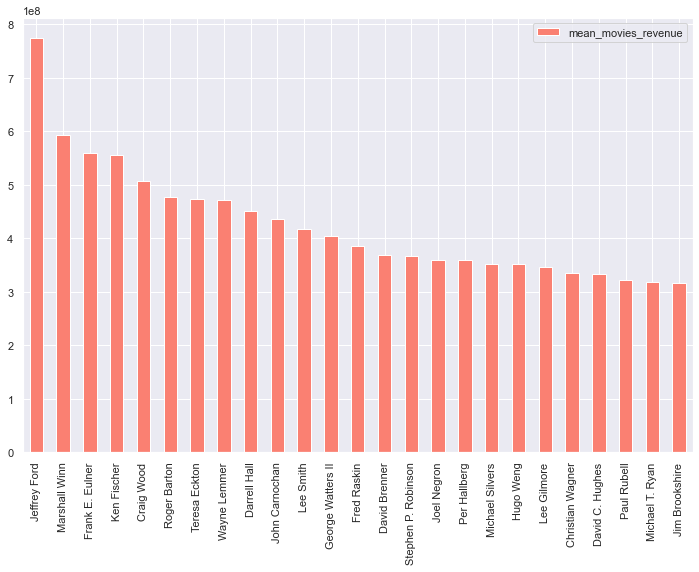

In [275]:
# editors
df['editors'] = df['crew'].apply(lambda x: re.findall("Editor', 'name': '(.+?)'", x))

editorsDict = {}
for element in df[["revenue", "editors"]].values:

    for editor in element[1]:
        if editor not in editorsDict:
            editorsDict[editor] = [element[0], 1]
        else:
            editorsDict[editor][0] += element[0]
            editorsDict[editor][1] += 1

editorsDict = {k: v for k, v in editorsDict.items() if v[1] >= 5}

for editor in editorsDict:
    editorsDict[editor][0] = editorsDict[editor][0]/editorsDict[editor][1]
    editorsDict[editor] = editorsDict[editor][0]




editors_df = pd.DataFrame.from_dict(editorsDict, orient='index', columns=["mean_movies_revenue"])
editors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<AxesSubplot:>

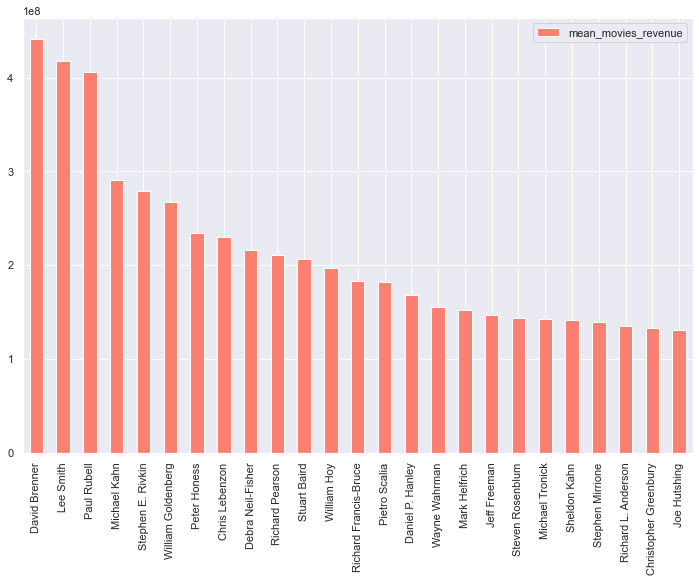

In [276]:
leadEditorDict = {}
for element in df[["revenue", "editors"]].values:
    if len(element[1]) < 1:
        continue
    if element[1][0] not in leadEditorDict:
        leadEditorDict[element[1][0]] = [element[0], 1]
    else:
        leadEditorDict[element[1][0]][0] += element[0]
        leadEditorDict[element[1][0]][1] += 1       

leadEditorDict = {k: v for k, v in leadEditorDict.items() if v[1] >= 5}

for editor in leadEditorDict:
    leadEditorDict[editor][0] = leadEditorDict[editor][0]/leadEditorDict[editor][1]
    leadEditorDict[editor] = leadEditorDict[editor][0]


    
    
editors_df = pd.DataFrame.from_dict(leadEditorDict, orient='index', columns=["mean_movies_revenue"])
editors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [277]:
leadEditorDict = {k: v for k, v in sorted(leadEditorDict.items(), key=lambda item: item[1], reverse = True)}
editorsDict = {k: v for k, v in sorted(editorsDict.items(), key=lambda item: item[1], reverse = True)}

def checkLeadEditor(crew):
    if len(crew) < 1 or crew[0] not in list(leadEditorDict)[:25]:
        return 0
    else:
        return 1

def checkTopEditors(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for editor in crew[:5]:
        if editor in list(editorsDict)[:100]:
            count += 1
    return count

def getEditorsRank(crew):
    if len(crew) < 1:
        return len(editorsDict)
    rank = 0
    for c in crew[:5]:
        if c in list(editorsDict):
            rank += list(editorsDict.keys()).index(c)
    if rank == 0:
        rank = len(editorsDict)
    return rank / len(crew)

In [278]:
df['topLeadEditor'] = df['editors'].apply(lambda x: checkLeadEditor(x))

df['numTopEditors'] = df['editors'].apply(lambda x: checkTopEditors(x))

df['editorsRank'] = df['editors'].apply(lambda x: getEditorsRank(x))

In [279]:
train_features.append('topLeadDirector')
log_features.append('numTopDirectors')
log_features.append('directorsRank')

train_features.append('topLeadExecProd')
log_features.append('numTopExecProd')
log_features.append('execProdRank')

train_features.append('topLeadProducer')
log_features.append('numTopProducers')
log_features.append('producersRank')

train_features.append('topLeadComposer')
log_features.append('numTopComposers')
log_features.append('composersRank')

train_features.append('topLeadDirectorPhoto')
log_features.append('numTopDirectorsPhoto')
log_features.append('directorsPhotoRank')

train_features.append('topLeadEditor')
log_features.append('numTopEditors')
log_features.append('editorsRank')

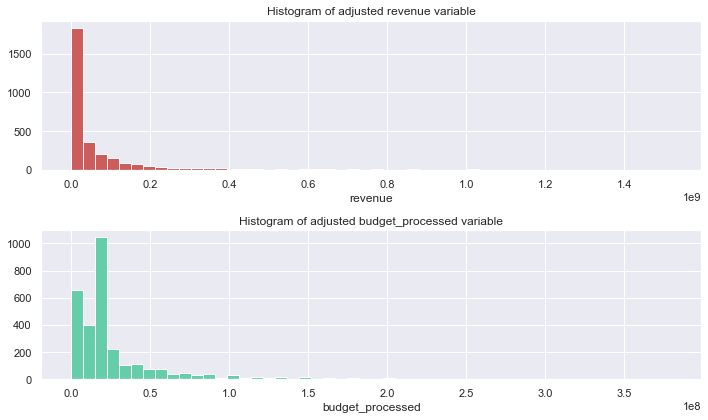

In [281]:
f, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(a=df.revenue, kde = False, ax = ax[0], color='indianred', hist_kws=dict(alpha=1))
ax[0].set_title("Histogram of adjusted revenue variable")
sns.distplot(a=df.budget_processed, kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of adjusted budget_processed variable")
f.tight_layout()

In [285]:
df['budget'][df['budget'] < 10000].count()

835

In [286]:
def getAvgStudioRev(movie):
    if movie.budget < 10000: 
        if len(movie.production_companies_reform) > 0:
            studios = movie.production_companies_reform
            median_revs = []
            for studio in studios:
                if studio in companies_df.index:
                     median_revs.append(float(companies_df.loc[studio]['median_rev']))
            if(len(median_revs) > 0) and mean(median_revs) > 10000:
                movie.budget_processed = mean(median_revs)
            else:
                movie.budget_processed = df.budget.median()
        else:
            movie.budget_processed = df.budget.median()
        
        
    
    if 'revenue' in movie and movie.revenue < 10000 and len(movie.production_companies_reform) > 0:
        studios = movie.production_companies_reform
        median_revs = []
        for studio in studios:
            if studio in companies_df.index:
                 median_revs.append(float(companies_df.loc[studio]['median_rev']))
        if(len(median_revs) > 0) and mean(median_revs) > 10000:
            movie.revenue = mean(median_revs)
        else:
            movie.revenue = df.revenue.median()
        return movie
    else:
        return movie

In [288]:
df = df.apply(getAvgStudioRev, axis=1)

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


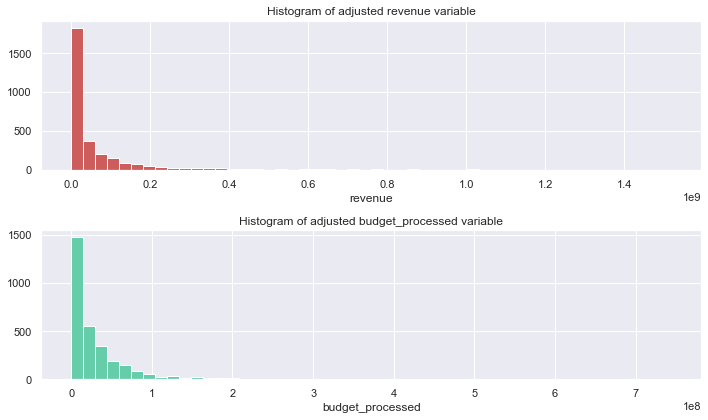

In [289]:
f, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(a=df.revenue, kde = False, ax = ax[0], color='indianred', hist_kws=dict(alpha=1))
ax[0].set_title("Histogram of adjusted revenue variable")
sns.distplot(a=df.budget_processed, kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of adjusted budget_processed variable")
f.tight_layout()

In [290]:
df['budget_to_year_ratio'] = df['budget_processed'] / (df['year'] * df['year'])

<ipython-input-290-71582ebfe239>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['budget_to_year_ratio'] = df['budget_processed'] / (df['year'] * df['year'])


In [291]:
df['runtime_to_year_ratio'] = df['runtime'] / (df['year'])

<ipython-input-291-010022e0271f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['runtime_to_year_ratio'] = df['runtime'] / (df['year'])


In [292]:
log_features.append('budget_to_year_ratio')
log_features.append('runtime_to_year_ratio')

In [293]:
len(df.columns)

3789

In [294]:
print(drop_cols)

['imdb_id', 'original_title', 'overview', 'popularity', 'poster_path', 'status']


In [295]:
print(train_features)

['belongs_to_collection', 'has_homepage', 'originally_english', 'topStudio', 'usa_produced', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'mondayRelease', 'tuesdayRelease', 'wednesdayRelease', 'thursdayRelease', 'fridayRelease', 'saturdayRelease', 'sundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'released_in_english', 'has_tagline', 'has_keywords', 'topLeadActor', 'topLeadDirector', 'topLeadExecProd', 'topLeadProducer', 'topLeadComposer', 'topLeadDirectorPhoto', 'topLeadEditor']


In [296]:
len(train_features)
print(len(train_features))

32


In [297]:
print(log_features)
print(len(log_features))



# DONE PREPROCESSING-DATA

['revenue', 'budget_processed', 'genre_rank', 'num_genres', 'numTopStudios', 'num_studios', 'studioRank', 'num_production_countries', 'runtime_processed', 'num_languages', 'title_len', 'num_cast', 'numTopActors', 'actorRanks', 'topActorRank', 'num_crew', 'num_male_crew', 'num_female_crew', 'numTopDirectors', 'directorsRank', 'numTopExecProd', 'execProdRank', 'numTopProducers', 'producersRank', 'numTopComposers', 'composersRank', 'numTopDirectorsPhoto', 'directorsPhotoRank', 'numTopEditors', 'editorsRank', 'budget_to_year_ratio', 'runtime_to_year_ratio']
32


In [298]:
# STEP [4]================================== Prepare The Data For Machine Learning Algorithms ================================================

In [299]:
for feat in log_features:
    df["log_" + feat] = np.log1p(df[feat])
    if feat != "revenue":
        train_features.append("log_" + feat)

<ipython-input-299-7ba858f1f641>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["log_" + feat] = np.log1p(df[feat])
<ipython-input-299-7ba858f1f641>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["log_" + feat] = np.log1p(df[feat])
<ipython-input-299-7ba858f1f641>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

In [300]:
print(train_features)
print()
print("Number of features: ", len(train_features))

['belongs_to_collection', 'has_homepage', 'originally_english', 'topStudio', 'usa_produced', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'mondayRelease', 'tuesdayRelease', 'wednesdayRelease', 'thursdayRelease', 'fridayRelease', 'saturdayRelease', 'sundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'released_in_english', 'has_tagline', 'has_keywords', 'topLeadActor', 'topLeadDirector', 'topLeadExecProd', 'topLeadProducer', 'topLeadComposer', 'topLeadDirectorPhoto', 'topLeadEditor', 'log_budget_processed', 'log_genre_rank', 'log_num_genres', 'log_numTopStudios', 'log_num_studios', 'log_studioRank', 'log_num_production_countries', 'log_runtime_processed', 'log_num_languages', 'log_title_len', 'log_num_cast', 'log_numTopActors', 'log_actorRanks', 'log_topActorRank', 'log_num_crew', 'log_num_male_crew', 'log_num_female_crew', 'log_numTopDirectors', 'log_directorsRank', 'log_numTopExecProd', 'log_execProdRank', 'log_numTopProducers', 'log_producersRank', 'log_numTopComposers', '

<ipython-input-301-b4e10227a1ea>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Correlation between numerical features')

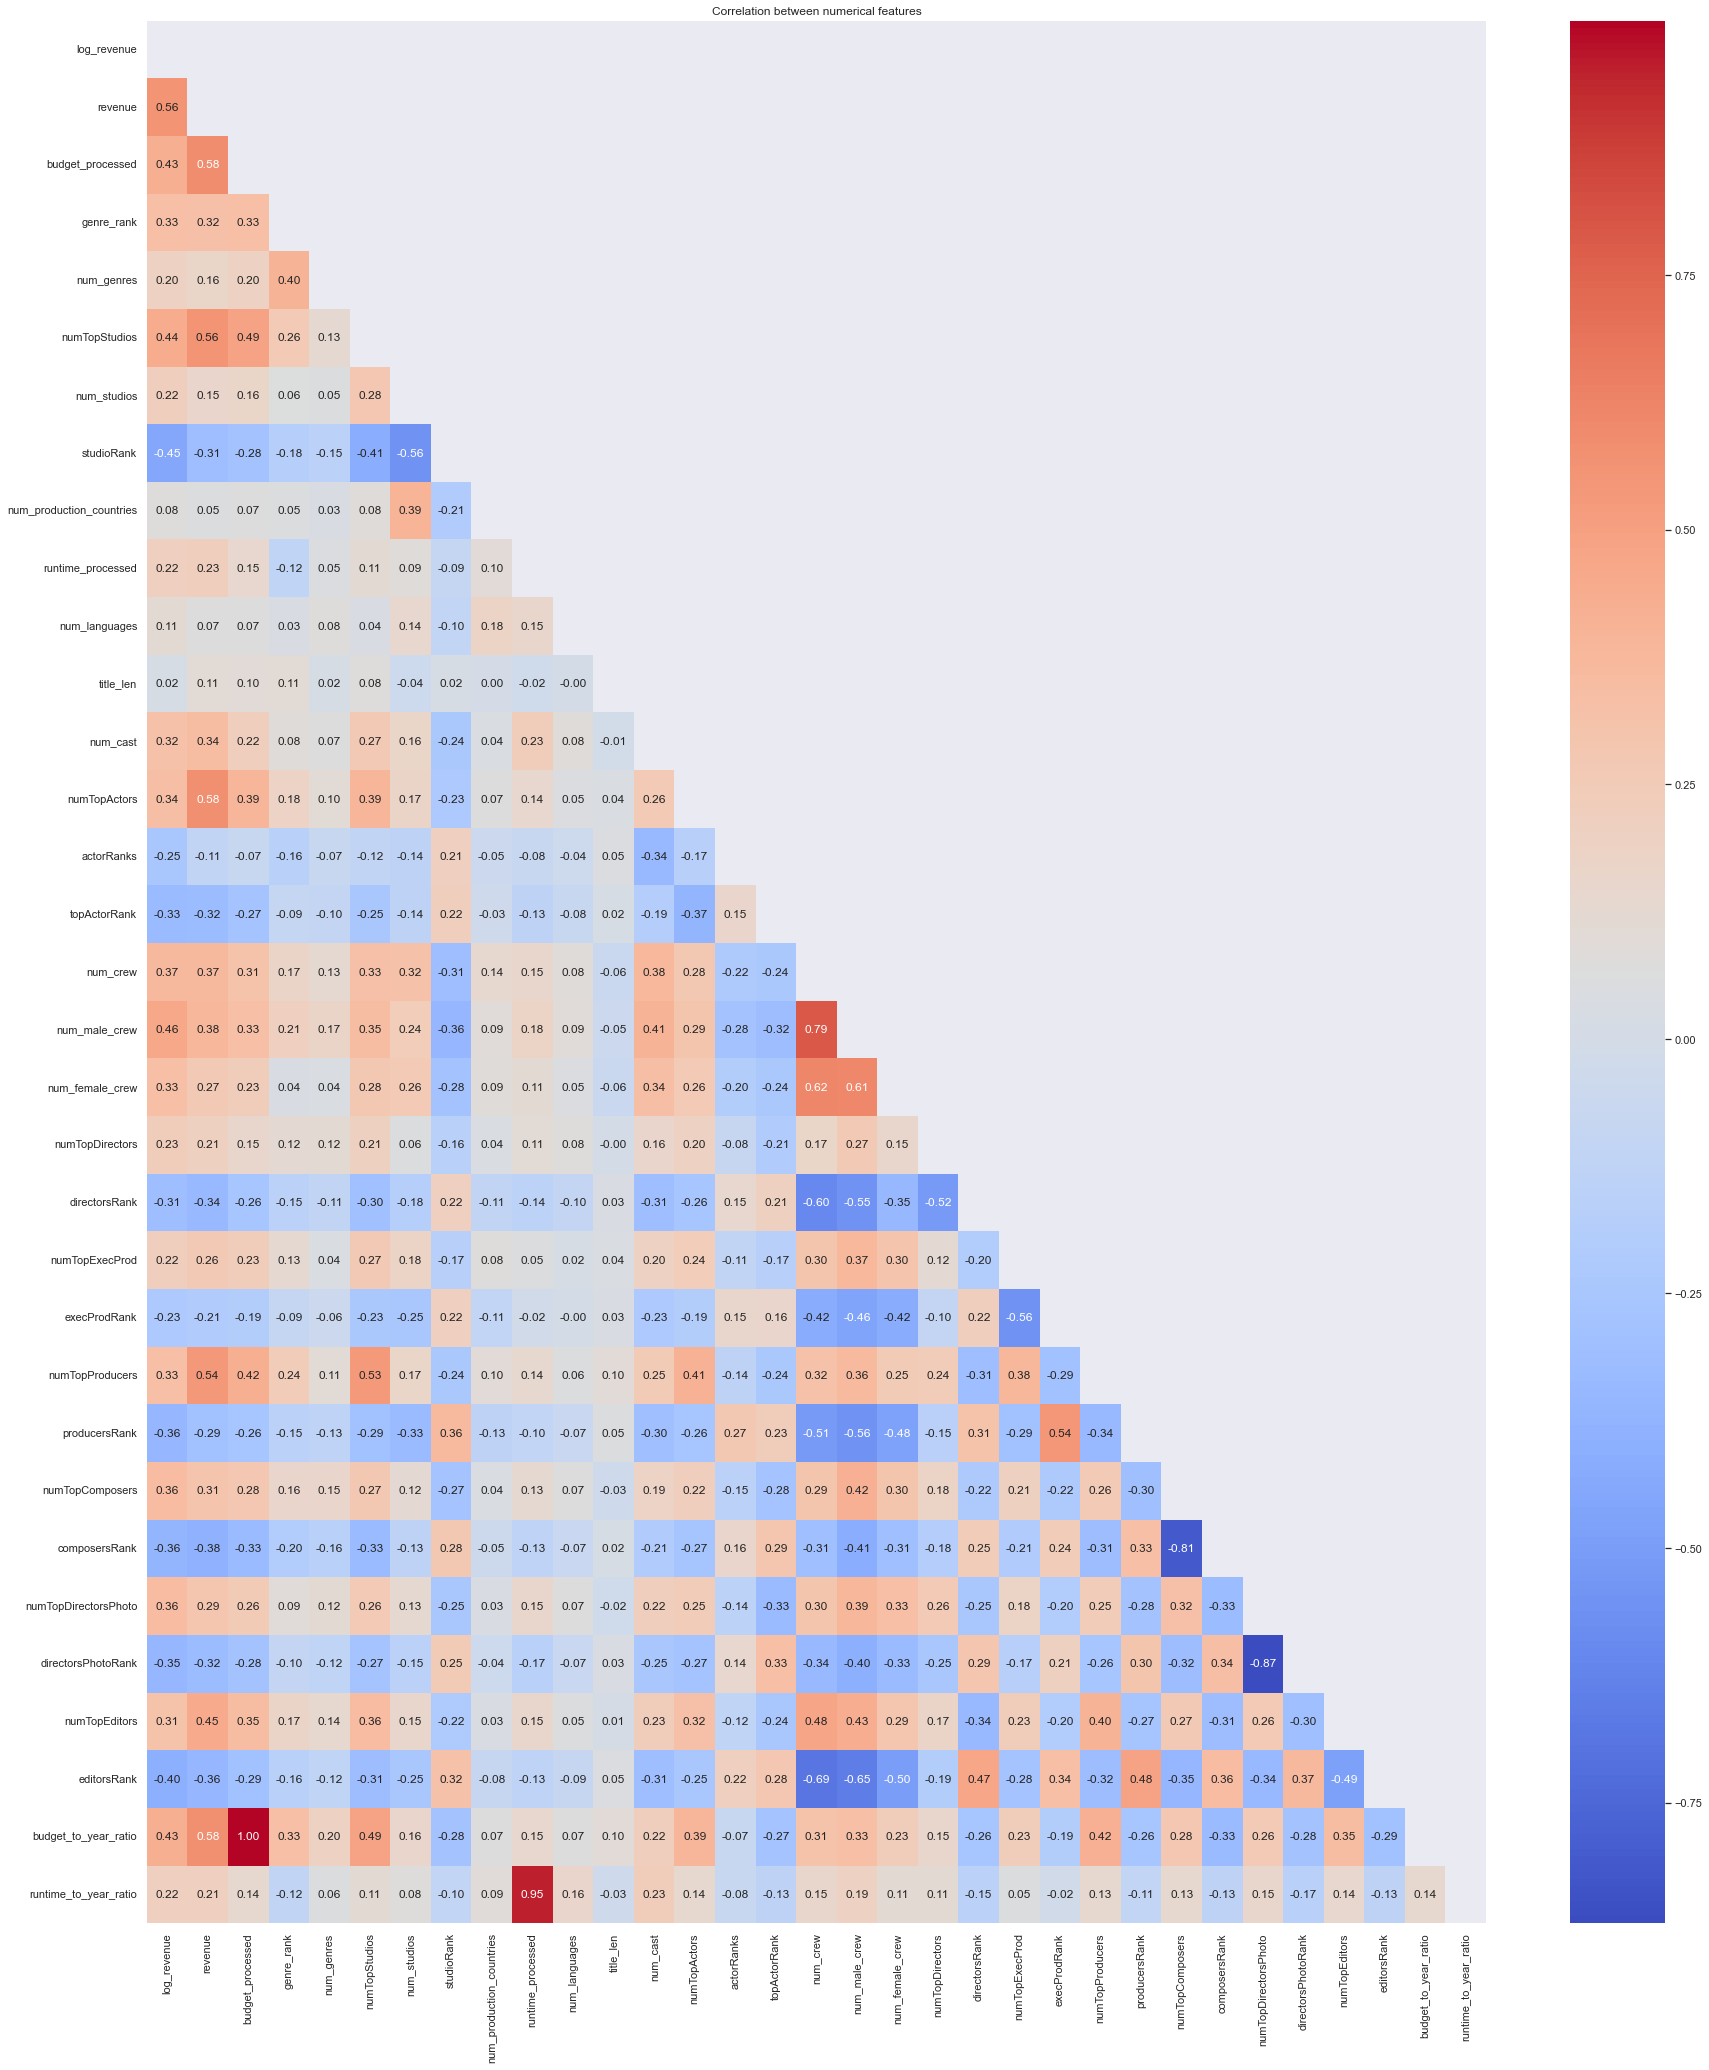

In [301]:
sns.set(rc={'figure.figsize':(30,35)})

corr = df[['log_revenue',*log_features]].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

<ipython-input-302-e10ec353c34b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Correlation between numerical features')

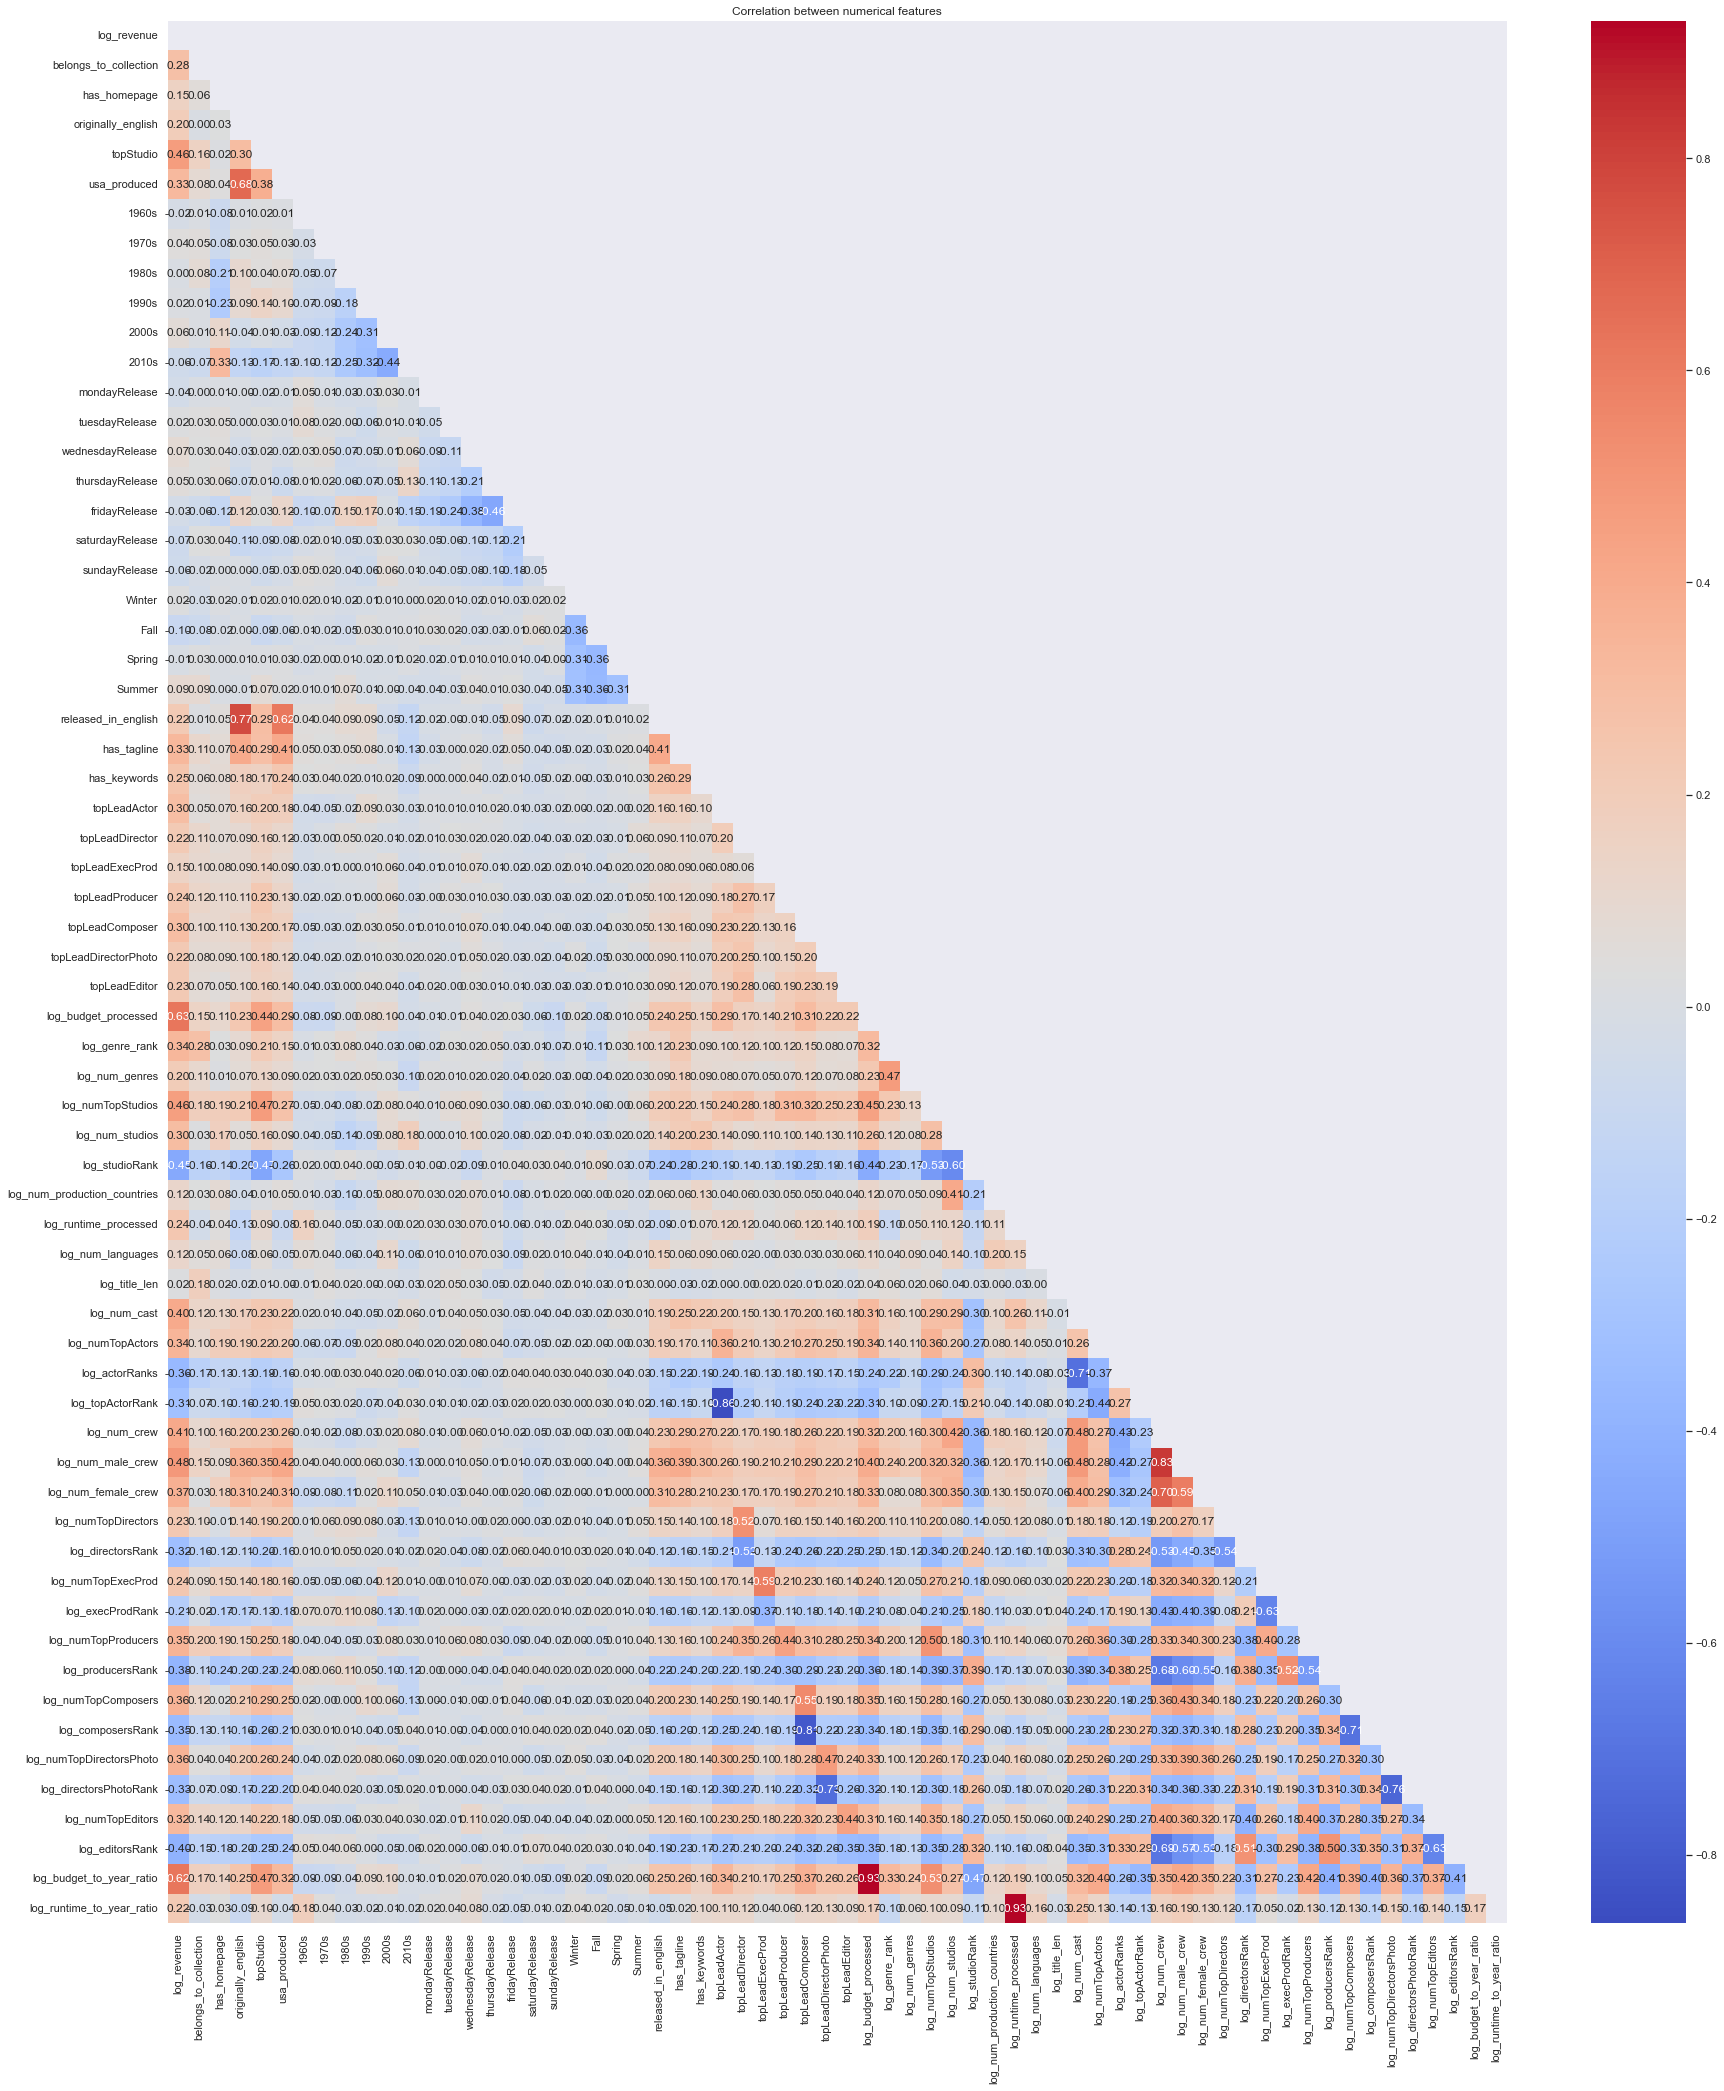

In [302]:
corr = df[['log_revenue', *train_features]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

In [303]:
create_clear_datasets = True
if create_clear_datasets:
    temp_df = pd.DataFrame()
    temp_df = df[train_features]
    temp_df['log_revenue'] = df['log_revenue']
    pd.DataFrame.to_csv(temp_df, '../datasets/films_revenue_dataset_clear.csv')

In [304]:
# STEP [5]================================== Train and Evaluate Models ================================================
X = np.array(df[train_features])
y = np.array(df['log_revenue'])

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [306]:
def get_evaluate(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    errors = abs(y_pred - y_test)
    mae = np.mean(errors)
    mape = 100 * (errors / y_test)
    print('Mean Squared Error: ', round(mse, 4))
    print('Root Mean Squared Error: ', round(rmse, 4))
    print('Mean Absolute Error: ', round(mae, 4))
    test_accuracy = 100 - np.mean(mape)
    print('Test Set Accuracy (from Mean Absolute Percentage Error):{:.3f}%'.format(test_accuracy))

In [307]:
# Try Random Forest Regression
new_run = True
if new_run:
    rfr_reg = RandomForestRegressor(n_estimators=120, max_depth=60)
    rfr_reg.fit(X_train, y_train)
    joblib.dump(rfr_reg, '../models/rfr_reg')
else:
    rfr_reg = joblib.load('../models/rfr_reg')

In [308]:
# Try Extra-Trees Regression
new_run = True
if new_run:
    extra_trees_reg = ExtraTreesRegressor(n_estimators=50, random_state=41)
    extra_trees_reg.fit(X_train, y_train)
    joblib.dump(extra_trees_reg, '../models/extra_trees_reg')
else:
    extra_trees_reg = joblib.load('../models/extra_trees_reg')

In [309]:
# Try Extreme Gradient Boost
new_run=True
if new_run:
    xgb_reg = XGBRegressor()
    xgb_reg.fit(X_train, y_train)
    joblib.dump(xgb_reg, '../models/xgb_reg')
else:
    xgb_reg = joblib.load('../models/xgb_reg')

In [310]:
# Try KNN Regression
new_run = True
if new_run:
    knn_reg = KNeighborsRegressor(n_neighbors=4, weights='distance')
    knn_reg.fit(X_train, y_train)
    joblib.dump(knn_reg, '../models/knn_reg')
else:
    knn_reg = joblib.load('../models/knn_reg')

In [311]:
# Try Light Gradient Boost Regression
new_run = True
if new_run:
    lgb_reg = LGBMRegressor()
    lgb_reg.fit(X_train, y_train)
    joblib.dump(lgb_reg, '../models/lgb_reg')
else:
    lgb_reg = joblib.load('../models/lgb_reg')

In [312]:
# Try Decision Tree Regression
new_run = True
if new_run:
    decision_tree_reg = DecisionTreeRegressor(random_state=41, max_depth=50)
    decision_tree_reg.fit(X_train, y_train)
    joblib.dump(decision_tree_reg, '../models/decision_tree_reg')
else:
    decision_tree_reg = joblib.load('../models/decision_tree_reg')

In [313]:
# Evaluate Models

In [314]:
print("Random Forest: \n")
get_evaluate(y_train, rfr_reg.predict(X_train))
print("====================")

Random Forest: 

Mean Squared Error:  0.3782
Root Mean Squared Error:  0.615
Mean Absolute Error:  0.4283
Test Set Accuracy (from Mean Absolute Percentage Error):97.042%


In [315]:
print("Extra-Trees: \n")
get_evaluate(y_train, extra_trees_reg.predict(X_train))
print("====================")

Extra-Trees: 

Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
Mean Absolute Error:  0.0
Test Set Accuracy (from Mean Absolute Percentage Error):100.000%


In [316]:
print("Extreme Gradient Boost: \n")
get_evaluate(y_train, xgb_reg.predict(X_train))
print("====================")

Extreme Gradient Boost: 

Mean Squared Error:  0.0831
Root Mean Squared Error:  0.2883
Mean Absolute Error:  0.2013
Test Set Accuracy (from Mean Absolute Percentage Error):98.639%


In [317]:
print("KNN Regression: \n")
get_evaluate(y_train, knn_reg.predict(X_train))
print("====================")

KNN Regression: 

Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
Mean Absolute Error:  0.0
Test Set Accuracy (from Mean Absolute Percentage Error):100.000%


In [318]:
print("Light Gradient Boost: \n")
get_evaluate(y_train, lgb_reg.predict(X_train))
print("====================")

Light Gradient Boost: 

Mean Squared Error:  0.6443
Root Mean Squared Error:  0.8027
Mean Absolute Error:  0.5765
Test Set Accuracy (from Mean Absolute Percentage Error):96.096%


In [319]:
print("Decision Tree: \n")
get_evaluate(y_train, decision_tree_reg.predict(X_train))

Decision Tree: 

Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
Mean Absolute Error:  0.0
Test Set Accuracy (from Mean Absolute Percentage Error):100.000%


In [320]:
# STEP [6]================================== Fine-tune Your Model ================================================

In [321]:
# Random Forest
param_grid_rfr = {
    'n_estimators': [50, 120, 200],
    'max_depth': [50, 120, 20]
}
rfr_reg_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=41), param_grid=param_grid_rfr)
rfr_reg_grid.fit(X_train, y_train)
print(f"Best params: \n{rfr_reg_grid.best_params_}")
get_evaluate(rfr_reg_grid.predict(X_train), y_train)

Best params: 
{'max_depth': 20, 'n_estimators': 120}
Mean Squared Error:  0.3759
Root Mean Squared Error:  0.6131
Mean Absolute Error:  0.4294
Test Set Accuracy (from Mean Absolute Percentage Error):96.573%


In [322]:
# Extra-Trees
param_grid_extree = {
    'n_estimators': [50, 120, 150],
    'max_depth': [20,120 , 150, 200]
}
extrees_reg = ExtraTreesRegressor(random_state=41)
extrees_reg_grid = GridSearchCV(estimator=extrees_reg, param_grid=param_grid_extree)
extrees_reg_grid.fit(X_train, y_train)
print(f"Best params: \n{extrees_reg_grid.best_params_}")
get_evaluate(extrees_reg_grid.predict(X_train), y_train)

Best params: 
{'max_depth': 120, 'n_estimators': 120}
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
Mean Absolute Error:  0.0
Test Set Accuracy (from Mean Absolute Percentage Error):100.000%


In [323]:
# Decision Tree
param_grid_decision_tree = {
    'max_depth': [10, 15, 20, 50, 100, 1000]
}
decision_tree_reg_grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=41), param_grid=param_grid_decision_tree)
decision_tree_reg_grid.fit(X_train, y_train)
print(f"Best params: \n{decision_tree_reg_grid.best_params_}")
get_evaluate(decision_tree_reg_grid.predict(X_train), y_train)

Best params: 
{'max_depth': 10}
Mean Squared Error:  1.0761
Root Mean Squared Error:  1.0373
Mean Absolute Error:  0.6696
Test Set Accuracy (from Mean Absolute Percentage Error):95.475%


In [324]:
# STEP [7]================================== Analyze And Test Your Solution ================================================

In [325]:
# Voting Regression with Random Forest, Extra-Trees and Light GBM
voting_reg = VotingRegressor(
    estimators=[('random-forest',RandomForestRegressor(max_depth=20, n_estimators=200 ,random_state=41)),
    ('extra-trees',ExtraTreesRegressor(max_depth=20, n_estimators=150,random_state=41)),
    ('light GBM',LGBMRegressor(random_state=41))]
)
voting_reg.fit(X_train, y_train)
voting_pred = voting_reg.predict(X_train)
get_evaluate(voting_pred, y_train)

Mean Squared Error:  0.2199
Root Mean Squared Error:  0.4689
Mean Absolute Error:  0.3346
Test Set Accuracy (from Mean Absolute Percentage Error):97.356%


In [326]:
# Voting Regression with Random Forest, Light GBM, XGB
voting_reg2 = VotingRegressor(
    estimators=[('random-forest',RandomForestRegressor(max_depth=20, n_estimators=200 ,random_state=41)),
    ('xgb',XGBRegressor()),
    ('light GBM',LGBMRegressor(random_state=41))]
)
voting_reg2.fit(X_train, y_train)
voting_pred = voting_reg.predict(X_train)
get_evaluate(voting_pred, y_train)

Mean Squared Error:  0.2199
Root Mean Squared Error:  0.4689
Mean Absolute Error:  0.3346
Test Set Accuracy (from Mean Absolute Percentage Error):97.356%


In [327]:
# Bagging with 10 Light GBM
bagging_reg = BaggingRegressor(
    base_estimator=LGBMRegressor(random_state=41),
    n_estimators=10
)
bagging_reg.fit(X_train, y_train)
bagging_pred = bagging_reg.predict(X_train)
get_evaluate(bagging_pred, y_train)

Mean Squared Error:  0.9456
Root Mean Squared Error:  0.9724
Mean Absolute Error:  0.6735
Test Set Accuracy (from Mean Absolute Percentage Error):94.481%


In [328]:
# Stacking with Extra-Trees and Random Forest, final is Light GBM
stack_reg = StackingRegressor(
    estimators=[('extra-trees',ExtraTreesRegressor(max_depth=20, n_estimators=150, random_state=41)),
    ('random-forest',RandomForestRegressor(max_depth=20, n_estimators=200 ,random_state=41))],
    final_estimator=LGBMRegressor(random_state=41)
)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_train)
get_evaluate(stack_pred, y_train)

Mean Squared Error:  0.575
Root Mean Squared Error:  0.7583
Mean Absolute Error:  0.4405
Test Set Accuracy (from Mean Absolute Percentage Error):95.700%


In [329]:
# AdaBoost
ada_reg = AdaBoostRegressor(
    base_estimator=LGBMRegressor(random_state=41),
    n_estimators=7
)
ada_reg.fit(X_train, y_train)
ada_pred = ada_reg.predict(X_train)
get_evaluate(ada_pred, y_train)

Mean Squared Error:  0.4148
Root Mean Squared Error:  0.6441
Mean Absolute Error:  0.5224
Test Set Accuracy (from Mean Absolute Percentage Error):96.521%


In [330]:
# ============ Test Models on Test Set ===================

In [331]:
# ========= Base Models ===============

In [332]:
# Random Forest
get_evaluate(y_test, rfr_reg.predict(X_test))

Mean Squared Error:  2.4754
Root Mean Squared Error:  1.5734
Mean Absolute Error:  1.1014
Test Set Accuracy (from Mean Absolute Percentage Error):92.839%


In [333]:
# Extra-Trees
get_evaluate(y_test, extra_trees_reg.predict(X_test))

Mean Squared Error:  2.4167
Root Mean Squared Error:  1.5546
Mean Absolute Error:  1.1034
Test Set Accuracy (from Mean Absolute Percentage Error):92.877%


In [334]:
# XGB
get_evaluate(y_test, xgb_reg.predict(X_test))

Mean Squared Error:  2.5883
Root Mean Squared Error:  1.6088
Mean Absolute Error:  1.1624
Test Set Accuracy (from Mean Absolute Percentage Error):92.375%


In [335]:
# Light GBM
get_evaluate(y_test, lgb_reg.predict(X_test))

Mean Squared Error:  2.3602
Root Mean Squared Error:  1.5363
Mean Absolute Error:  1.1041
Test Set Accuracy (from Mean Absolute Percentage Error):92.823%


In [336]:
# KNN
get_evaluate(y_test, knn_reg.predict(X_test))

Mean Squared Error:  3.0509
Root Mean Squared Error:  1.7467
Mean Absolute Error:  1.2544
Test Set Accuracy (from Mean Absolute Percentage Error):91.779%


In [337]:
# Decision Tree
get_evaluate(y_test, decision_tree_reg.predict(X_test))

Mean Squared Error:  5.1739
Root Mean Squared Error:  2.2746
Mean Absolute Error:  1.5608
Test Set Accuracy (from Mean Absolute Percentage Error):88.626%


In [338]:
# ================== Tuned Models ================

In [339]:
# Random Forest tuned
get_evaluate(y_test, rfr_reg_grid.predict(X_test))

Mean Squared Error:  2.4405
Root Mean Squared Error:  1.5622
Mean Absolute Error:  1.094
Test Set Accuracy (from Mean Absolute Percentage Error):92.872%


In [340]:
# Extra-Trees tuned
get_evaluate(y_test, extrees_reg_grid.predict(X_test))

Mean Squared Error:  2.3618
Root Mean Squared Error:  1.5368
Mean Absolute Error:  1.0875
Test Set Accuracy (from Mean Absolute Percentage Error):92.964%


In [341]:
# Decision Tree tuned
get_evaluate(y_test, decision_tree_reg_grid.predict(X_test))

Mean Squared Error:  4.256
Root Mean Squared Error:  2.063
Mean Absolute Error:  1.4434
Test Set Accuracy (from Mean Absolute Percentage Error):89.817%


In [342]:
# ================ Ensemble Models ===================

In [343]:
# Voting Regression with Random Forest, Extra-Trees and Light GBM
get_evaluate(y_test, voting_reg.predict(X_test))

Mean Squared Error:  2.2796
Root Mean Squared Error:  1.5098
Mean Absolute Error:  1.063
Test Set Accuracy (from Mean Absolute Percentage Error):93.129%


In [344]:
# Voting Regression with Random Forest, Light GBM, XGB
get_evaluate(y_test, voting_reg2.predict(X_test))

Mean Squared Error:  2.285
Root Mean Squared Error:  1.5116
Mean Absolute Error:  1.071
Test Set Accuracy (from Mean Absolute Percentage Error):93.058%


In [345]:
# Bagging with 10 Light GBM
get_evaluate(y_test, bagging_reg.predict(X_test))

Mean Squared Error:  2.2837
Root Mean Squared Error:  1.5112
Mean Absolute Error:  1.074
Test Set Accuracy (from Mean Absolute Percentage Error):93.010%


In [346]:
# AdaBoost
get_evaluate(y_test, ada_reg.predict(X_test))

Mean Squared Error:  2.3814
Root Mean Squared Error:  1.5432
Mean Absolute Error:  1.1034
Test Set Accuracy (from Mean Absolute Percentage Error):92.693%


In [347]:
# Stacking with Extra-Trees and Random Forest, final is Light GBM
get_evaluate(y_test, stack_reg.predict(X_test))

Mean Squared Error:  2.5521
Root Mean Squared Error:  1.5975
Mean Absolute Error:  1.127
Test Set Accuracy (from Mean Absolute Percentage Error):92.698%


In [348]:
# =========== Choose Model ===================
# Best Model: Voting Regression with Random Forest, Extra-Trees and Light GBM
# Code:
''' voting_reg = VotingRegressor(
    estimators=[('random-forest',RandomForestRegressor(max_depth=20, n_estimators=200 ,random_state=41)),
    ('extra-trees',ExtraTreesRegressor(max_depth=20, n_estimators=150,random_state=41)),
    ('light GBM',LGBMRegressor(random_state=41))]
) '''

" voting_reg = VotingRegressor(\n    estimators=[('random-forest',RandomForestRegressor(max_depth=20, n_estimators=200 ,random_state=41)),\n    ('extra-trees',ExtraTreesRegressor(max_depth=20, n_estimators=150,random_state=41)),\n    ('light GBM',LGBMRegressor(random_state=41))]\n) "

In [349]:
# STEP [8]================================== Launch, monotor and maintain your system ================================================

In [350]:
# -----------------------------------------------------DONE--------------------------------------------------------------------





# DATASET LINK:
# https://www.kaggle.com/c/tmdb-box-office-prediction


# REFERECE LINK:
# [1]: https://github.com/nickmitch21/TMDB-Box-Office-Prediction
# [2]: https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation
# [3]: scikit-learn.org